<a href="https://colab.research.google.com/github/jgkorman/Python-Projects/blob/main/Parsing_Congressional_Tweets_to_understand_climate_and_health_political_priorities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DSTEP21 // Assignment #3 (GGD: Total = 78 / 80)**

assigned : **Sep 26, 2021**

DUE : **Oct 3, 2021 11:59pm**

## Parsing Congressional Tweets

<img src="https://www.dailydot.com/wp-content/uploads/2019/01/twitter-on-capitol-hill.jpg" width=625>

---

### OVERVIEW

Social media use by congress is [booming](https://fas.org/sgp/crs/misc/R45337.pdf), with members using the platform to directly engage with their constiuents, take part in the national conversation around timely issues, and fundraise for (re)election.  Participation in social media discourse is quickly becoming [mandatory](https://fcw.com/articles/2018/08/08/social-media-congress.aspx) for public servants looking to both compete in the messaging game and solicit feedback from those who are affected by their policies.

In this assignment, you will be using string manipulations and indexing to parse congressional tweets to extract patterns of twitter usage by congress that are focused on issues of public health and climate.

<b>

Rules for assignments:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed below.  Direct copying from someone else's notebook is not permitted.


2. All solutions and outputs must be derived with python and notebooks should be "runable" by me (top to bottom) without errors.

3. Late assignments will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

#### **PART 0 - WEEKLY VISUALIZATION**

As before, this is – and will continue to be – a *very* open-ended task with two objectives:

1. ***Find a data set on the web that relates to a policy problem***

2. ***Make a plot of some characteristics/features of that data using python on your own computer***

These "weekly visualizations" should be done without collaborating with other students, in a <u>separate notebook</u>, and should **include a link** to where I can find the data.  **A caption is also necessary** but it is *not* a requirement that the visualization show an obvious relationship (e.g., correlation or scaling) between the features of the data set.  

Lastly, these visualizations should be made **using Python/Jupyter running on your own machine** and not Colaboratory.  If you do not have access to your own computer on which you have permissions to install software for yourself, or if your machine does not have sufficient computational resources to load and analyze data, please let me know!

**To submit the visualization, the `.ipynb` Jupyter notebook that you create and write on your machine should be uploaded to your `dstep21/assignments/submissions/<username>/` folder.**

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

None

### **PART 1 - Background**

**<u>In your own words</u>, provide a brief (~350-500 words) descriptive overview of the use of social media by public servants and congress in particular, including *references* within the description via weblinks (like the "booming" link in the Overview in the cell above).**

Social media use by public servants and congress in particular has exploded recently. The one major benefit of members of congress using social media is it has cut down on the [transaction costs](https://fcw.com/articles/2018/08/08/social-media-congress.aspx) required to communicate directly with their constituents. Social media use is now at a point where nearly every member of Congress is using it to advance their platform in one way or another. Interestingly enough, however, is the fact that social media interaction varies between parties. A recent report by [PEW](https://www.pewresearch.org/internet/2020/07/16/congress-soars-to-new-heights-on-social-media/) demonstrated that while Democratic lawmakers are more apt to post on social media -- Republican lawmakers receive more engagement on their posts. This could signify that more is not necessarily better as Republican's may be getting a better ROI (Return on their investment) relative to the amount they are posting. Perhaps there is even some [hypocrisy](https://www.businessinsider.com/congress-members-social-media-records-analysis-2021-1) amongst lawmakers on both sides of the aisle who increasingly attack and confront big tech social media companies but yet are both posting more than ever on the respective platforms! Perhaps that is why lawmakers haven't necessarily targeted Twitter like they have Facebook -- because Twitter is by far the most popular platform to use amongst members of Congress. 

Another benefit of social media is it increasingly allows old lawmakers to [target younger audiences](https://www.businessinsider.com/congress-members-social-media-records-analysis-2021-1) -- who are becoming more and more crucial in elections these days. In fact, social media use proved crucial for the election of President Joe Biden as it [allowed him to reach](https://www.forbes.com/sites/petersuciu/2020/11/17/social-media-proved-crucial-for-joe-biden--it-allowed-him-to-connect-with-young-voters-and-avoid-his-infamous-gaffes/?sh=6e23fe1a4148) younger voters who he traditionally was not heavily associated with. However, social media use among politicians also can pose dangers. For instance, for politicians that want to cause harm to please a certain base of voters -- social media offers a ripe platform to spread disinformation and misinformation campaigns along with promote loony [conspiracy theories](https://www.theatlantic.com/technology/archive/2019/05/why-social-media-ruining-political-discourse/589108/). These dangerous conspiracies being promoted as of recent threaten to destroy the very fabric of our beloved democracy. Meanwhile, this isn't a one sided feeling however. Both sides of the aisle feel that social media is increasingly [harming the country](https://www.pewresearch.org/fact-tank/2020/10/15/64-of-americans-say-social-media-have-a-mostly-negative-effect-on-the-way-things-are-going-in-the-u-s-today/) along with the political climate. Perhaps citizens are feeling this way because [anti-system/anti-party candidates](https://www.brookings.edu/blog/techtank/2017/04/28/why-are-populists-winning-online-social-media-reinforces-their-anti-establishment-message/) are the types of politicians who continue to use social media to their advantage while eroding the vertical linkages that traditionally stabilized democratic politics. At the end of the day, social media use amongst politicians and public servants has its advantages as it can create stronger linkages with voters while cutting down on the transaction costs required to reach such voters. However, social media use can also be used by politicians to harm democracy while promoting harmful conspiracy theories. In the end, the pros must be weighed against the cons -- social media use amongst public servants is not perfect -- but with the right protections in place, it can be a useful tool while also helping members of Congress to more easily communicate with their constituents. 

### **Part 2 - Loading and Preparing the Data**

The data that you will be using for this assignment comes from [this project](https://github.com/alexlitel/congresstweets) that collects and collates tweets from congresspersons each day.

**Run the following cell to create a list of filenames for the summer (June, July, and August) of 2021.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# -- set the summer 2021 filenames
json_names = [
           "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-01.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-02.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-03.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-04.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-05.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-06.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-07.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-08.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-09.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-10.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-11.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-12.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-13.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-14.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-15.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-16.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-17.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-18.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-19.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-20.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-21.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-22.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-23.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-24.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-25.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-26.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-27.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-28.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-29.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-30.json", 
           "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-01.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-02.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-03.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-04.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-05.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-06.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-07.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-08.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-09.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-10.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-11.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-12.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-13.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-14.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-15.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-16.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-17.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-18.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-19.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-20.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-21.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-22.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-23.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-24.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-25.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-26.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-27.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-28.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-29.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-30.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-07-31.json", 
           "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-01.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-02.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-03.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-04.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-05.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-06.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-07.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-08.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-09.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-10.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-11.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-12.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-13.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-14.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-15.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-16.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-17.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-18.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-19.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-20.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-21.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-22.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-23.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-24.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-25.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-26.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-27.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-28.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-29.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-30.json", "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-08-31.json"
           ]

In [ ]:
json_names

['https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-01.json',
 'https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-02.json',
 'https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-03.json',
 'https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-04.json',
 'https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-05.json',
 'https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-06.json',
 'https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-07.json',
 'https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-08.json',
 'https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-09.json',
 'https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-10.json',
 'https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-11.json',

**Run the following cell to load the data and describe what each step is doing by filling in the comments below (replace the "???" in each comment with your own words).**

In [ ]:
# -- This is creating a list where we can work with the data that is encoded in the the json files
data_list = []

# -- This is running a for loop that goes through every file in json_names
for fname in json_names:

  # -- This is printing out every file fname in the json file 
  print(fname)

  # -- This is appending the list of data that we made above with the json files in order to read them and if it isn't able to read the file --> it will execute as 'NOT Found'
  try:
    data_list.append(pd.read_json(fname))
  except:
    print("  ...NOT FOUND!!!")

# -- This puts the data in a workable format under the dataframe "data" by concatening what is inside our list of data
data = pd.concat(data_list)

https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-01.json
https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-02.json
https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-03.json
https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-04.json
https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-05.json
https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-06.json
https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-07.json
https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-08.json
https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-09.json
https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-10.json
https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/2021-06-11.json
https://raw.githubusercontent.com/alexlitel

In [ ]:
data

,id,screen_name,user_id,time,link,text,source
0,1399833079028629504,SenOssoff,1356714265894408192,2021-06-01T16:59:48-04:00,https://www.twitter.com/SenOssoff/statuses/139...,“It's thanks to Georgia voters that we have a ...,Twitter Web App
1,1399822810885804032,SenOssoff,1356714265894408192,2021-06-01T16:19:00-04:00,https://www.twitter.com/SenOssoff/statuses/139...,🌈,Twitter Web App
2,1399800202438008832,SenOssoff,1356714265894408192,2021-06-01T14:49:09-04:00,https://www.twitter.com/SenOssoff/statuses/139...,A once-in-a-generation moment. http://pbs.twim...,Twitter Media Studio
3,1399748629875789824,SenOssoff,1356714265894408192,2021-06-01T11:24:14-04:00,https://www.twitter.com/SenOssoff/statuses/139...,“We have to seize this moment to get it done b...,Twitter Web App
4,1399868714640723968,RepKahele,1351966874377056256,2021-06-01T19:21:24-04:00,https://www.twitter.com/RepKahele/statuses/139...,"June is #Pride month, when we build on the leg...",Twitter for iPhone
...,...,...,...,...,...,...,...
2972,1432902534390185984,NormaJTorres,236279233,2021-08-31T23:06:00-04:00,https://www.twitter.com/NormaJTorres/statuses/...,Qualifying California residents will receive t...,Twitter for iPhone
2973,1432902518447558656,brianschatz,47747074,2021-08-31T23:05:57-04:00,https://www.twitter.com/brianschatz/statuses/1...,House Republicans are explicitly threatening p...,Twitter for iPhone
2974,1432902399522390016,SenJeffMerkley,29201047,2021-08-31T23:05:28-04:00,https://www.twitter.com/SenJeffMerkley/statuse...,Texas Democrats fought tirelessly for as long ...,Twitter for iPhone
2975,1432902257557884928,RepRoKhanna,816298918468259840,2021-08-31T23:04:54-04:00,https://www.twitter.com/RepRoKhanna/statuses/1...,To anyone who is on TV demonizing the Afghan A...,Twitter Media Studio


In [ ]:
data.dtypes

id              int64
screen_name    object
user_id         int64
time           object
link           object
text           object
source         object
dtype: object

In [ ]:
data['screen_name'].unique()

array(['SenOssoff', 'RepKahele', 'SenAlexPadilla', ..., 'Meuser4Congress',
       'jerrymcnerney', 'aguilarpete'], dtype=object)

In [ ]:
data['screen_name'].str.replace(", ..., ","")

0            SenOssoff
1            SenOssoff
2            SenOssoff
3            SenOssoff
4            RepKahele
             ...      
2972      NormaJTorres
2973       brianschatz
2974    SenJeffMerkley
2975       RepRoKhanna
2976     RepTroyCarter
Name: screen_name, Length: 213526, dtype: object

In [ ]:
data['screen_name'].unique()

array(['SenOssoff', 'RepKahele', 'SenAlexPadilla', ..., 'Meuser4Congress',
       'jerrymcnerney', 'aguilarpete'], dtype=object)

Notice that you now have a DataFrame `data` containing tweets for the summer of 2021.  However, the accounts from which these are sent include all accounts affiliated with Congresspersons and we would like to focus on only official accounts.

**Select only those tweets that are from official accounts for each Congressperson by:**

<b>

1. loading the accounts data from `dstep21/data/congress_tweets/congress_social_media_handles.csv` into a DataFrame and calling it `accts`.

2. creating a `True`/`False` index for the `data` DataFrame that is `True` when `"screen_name"` from `data` is in the `"Twitter"` column in `accts`.

3. using that index to sub-select only those tweets from official accounts, put those in a new DataFrame and call it `tweets`.

</b>

In [ ]:
fname = "/content/drive/MyDrive/DSTEP721/data/Copy of congress_social_media_handles.csv"
accts = pd.read_csv(fname)

In [ ]:
accts.dtypes

State                 object
Member of Congress    object
Name                  object
Party                 object
Twitter               object
Instagram             object
Facebook              object
dtype: object

In [ ]:
accts

,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook
0,Alabama,U.S. Senator,"Shelby, Richard",R,@SenShelby,@senatorshelby,x
1,Alabama,U.S. Senator,"Tuberville, Tommy",R,@Ttuberville,@sentuberville,x
2,Alabama 1st District,U.S. Prepresentative,"Carl, Jerry",R,@RepJerryCarl,@repjerrycarl,x
3,Alabama 2nd District,U.S. Prepresentative,"Moore, Barry",R,@RepBarryMoore,@barrymooreforcongress,x
4,Alabama 3rd District,U.S. Prepresentative,"Rogers, Mike",R,@RepMikeRogers,@repmikerogersal,x
...,...,...,...,...,...,...,...
530,Wisconsin 7th District,U.S. Prepresentative,"Tiffany, Thomas",R,@TomTiffanyWI,NaN,x
531,Wisconsin 8th District,U.S. Prepresentative,"Gallagher, Mike",R,@MikeforWI,@repgallagher,x
532,Wyoming,U.S. Senator,"Lummis, Cynthia",R,@SenLummis,@sencynthialummis,x
533,Wyoming,U.S. Senator,"Barrasso, John",R,@SenJohnBarrasso,@senjohnbarrasso,x


In [ ]:
accts["Twitter"].unique()

array(['@SenShelby', '@Ttuberville', '@RepJerryCarl', '@RepBarryMoore',
       '@RepMikeRogers', '@Robert_Aderholt', '@RepMoBrooks',
       '@USRepGaryPalmer', '@RepTerriSewell', '@SenDanSullivan',
       '@lisamurkowski', '@RepDonYoung', '@SenMarkKelly',
       '@SenatorSinema', '@TomOHalleran', '@RepKirkPatrick',
       '@RepRaulGrijalva', '@RepGosar', '@AndyBiggs4AZ', '@RepDavid',
       '@RepRubenGallego', '@RepDLesko', '@RepGregStanton',
       '@SenTomCotton', '@JohnBoozman', '@RepRickCrawford',
       '@RepFrenchHill', '@rep_stevewomack', '@RepWesterman',
       '@SenFeinstein', '@KamalaHarris', '@RepLaMalfa', '@RepHuffman',
       '@RepGaramendi', '@RepMcClintock', '@RepThompson', '@DorisMatsui',
       '@RepBera', '@JayObernolte', '@RepMcNerney', '@RepJoshHarder',
       '@RepDeSaulnier', '@SpeakerPelosi', '@RepBarbaraLee', '@RepSpeier',
       '@RepSwalwell', '@RepJimCosta', '@RoKhannaUSA', '@RepAnnaEshoo',
       '@RepZoeLofgren', '@JimmyPanetta', '@RepDavidValadao',
       

In [ ]:
#2. Creating a true/false index for screen names 
# first remove the @ sign in the Twitter Handle 
Twitter = accts["Twitter"].str.replace("@","")

In [ ]:
accts["Twitter"]=Twitter

In [ ]:
accts

,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook
0,Alabama,U.S. Senator,"Shelby, Richard",R,SenShelby,@senatorshelby,x
1,Alabama,U.S. Senator,"Tuberville, Tommy",R,Ttuberville,@sentuberville,x
2,Alabama 1st District,U.S. Prepresentative,"Carl, Jerry",R,RepJerryCarl,@repjerrycarl,x
3,Alabama 2nd District,U.S. Prepresentative,"Moore, Barry",R,RepBarryMoore,@barrymooreforcongress,x
4,Alabama 3rd District,U.S. Prepresentative,"Rogers, Mike",R,RepMikeRogers,@repmikerogersal,x
...,...,...,...,...,...,...,...
530,Wisconsin 7th District,U.S. Prepresentative,"Tiffany, Thomas",R,TomTiffanyWI,NaN,x
531,Wisconsin 8th District,U.S. Prepresentative,"Gallagher, Mike",R,MikeforWI,@repgallagher,x
532,Wyoming,U.S. Senator,"Lummis, Cynthia",R,SenLummis,@sencynthialummis,x
533,Wyoming,U.S. Senator,"Barrasso, John",R,SenJohnBarrasso,@senjohnbarrasso,x


In [ ]:
# -- create a new DataFrame containing the number of stops in 2017, 
#    2018, 2019, and 2020, and make a bar plot


# -- calculate number of stops for each year
#Ossoff = accts["Twitter"].str.contains("SenOssoff")
#Kahele = accts["Twitter"].str.contains("RepKahele")
#Padilla = accts["Twitter"].str.contains("SenAlexPadilla")
#Meuser = accts["Twitter"].str.contains("Meuser4Congress")
#mcnerney = accts["Twitter"].str.contains("jerrymcnerney")
#pete = accts["Twitter"].str.contains("aguilarpete")


# -- make a list of lists and create a DataFrame
#ll_stops = [[SenOssoff, Ossoff], [RepKahele, Kahele], [SenAlexPadilla, Padilla], [Meuser4Congress, Meuser, [jerrymcnerney, mcnerney,], [aguilarpete, pete]]



In [ ]:
#accts1 = accts[Ossoff]

In [ ]:
#accts1

In [ ]:
accts.dtypes

State                 object
Member of Congress    object
Name                  object
Party                 object
Twitter               object
Instagram             object
Facebook              object
dtype: object

In [ ]:
type(accts["Twitter"].iloc[0])

str

In [ ]:
type(data["screen_name"].iloc[0])

str

In [ ]:
#data = data.merge(accts, left_on="screen_name", right_on="Twitter", sort=False)

In [ ]:
data

,id,screen_name,user_id,time,link,text,source
0,1399833079028629504,SenOssoff,1356714265894408192,2021-06-01T16:59:48-04:00,https://www.twitter.com/SenOssoff/statuses/139...,“It's thanks to Georgia voters that we have a ...,Twitter Web App
1,1399822810885804032,SenOssoff,1356714265894408192,2021-06-01T16:19:00-04:00,https://www.twitter.com/SenOssoff/statuses/139...,🌈,Twitter Web App
2,1399800202438008832,SenOssoff,1356714265894408192,2021-06-01T14:49:09-04:00,https://www.twitter.com/SenOssoff/statuses/139...,A once-in-a-generation moment. http://pbs.twim...,Twitter Media Studio
3,1399748629875789824,SenOssoff,1356714265894408192,2021-06-01T11:24:14-04:00,https://www.twitter.com/SenOssoff/statuses/139...,“We have to seize this moment to get it done b...,Twitter Web App
4,1399868714640723968,RepKahele,1351966874377056256,2021-06-01T19:21:24-04:00,https://www.twitter.com/RepKahele/statuses/139...,"June is #Pride month, when we build on the leg...",Twitter for iPhone
...,...,...,...,...,...,...,...
2972,1432902534390185984,NormaJTorres,236279233,2021-08-31T23:06:00-04:00,https://www.twitter.com/NormaJTorres/statuses/...,Qualifying California residents will receive t...,Twitter for iPhone
2973,1432902518447558656,brianschatz,47747074,2021-08-31T23:05:57-04:00,https://www.twitter.com/brianschatz/statuses/1...,House Republicans are explicitly threatening p...,Twitter for iPhone
2974,1432902399522390016,SenJeffMerkley,29201047,2021-08-31T23:05:28-04:00,https://www.twitter.com/SenJeffMerkley/statuse...,Texas Democrats fought tirelessly for as long ...,Twitter for iPhone
2975,1432902257557884928,RepRoKhanna,816298918468259840,2021-08-31T23:04:54-04:00,https://www.twitter.com/RepRoKhanna/statuses/1...,To anyone who is on TV demonizing the Afghan A...,Twitter Media Studio


In [ ]:
accts

,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook
0,Alabama,U.S. Senator,"Shelby, Richard",R,SenShelby,@senatorshelby,x
1,Alabama,U.S. Senator,"Tuberville, Tommy",R,Ttuberville,@sentuberville,x
2,Alabama 1st District,U.S. Prepresentative,"Carl, Jerry",R,RepJerryCarl,@repjerrycarl,x
3,Alabama 2nd District,U.S. Prepresentative,"Moore, Barry",R,RepBarryMoore,@barrymooreforcongress,x
4,Alabama 3rd District,U.S. Prepresentative,"Rogers, Mike",R,RepMikeRogers,@repmikerogersal,x
...,...,...,...,...,...,...,...
530,Wisconsin 7th District,U.S. Prepresentative,"Tiffany, Thomas",R,TomTiffanyWI,NaN,x
531,Wisconsin 8th District,U.S. Prepresentative,"Gallagher, Mike",R,MikeforWI,@repgallagher,x
532,Wyoming,U.S. Senator,"Lummis, Cynthia",R,SenLummis,@sencynthialummis,x
533,Wyoming,U.S. Senator,"Barrasso, John",R,SenJohnBarrasso,@senjohnbarrasso,x


In [ ]:
#Boolean = data['screen_name']==data['Twitter']

In [ ]:
#Boolean.unique()

In [ ]:
# -- Part 2 creating a True/False index for the data DataFrame that is True when "screen_name" from data is in the "Twitter" column in accts.
#data["Boolean"]=Boolean

In [ ]:
#data["Boolean"].unique()

In [ ]:
data

,id,screen_name,user_id,time,link,text,source
0,1399833079028629504,SenOssoff,1356714265894408192,2021-06-01T16:59:48-04:00,https://www.twitter.com/SenOssoff/statuses/139...,“It's thanks to Georgia voters that we have a ...,Twitter Web App
1,1399822810885804032,SenOssoff,1356714265894408192,2021-06-01T16:19:00-04:00,https://www.twitter.com/SenOssoff/statuses/139...,🌈,Twitter Web App
2,1399800202438008832,SenOssoff,1356714265894408192,2021-06-01T14:49:09-04:00,https://www.twitter.com/SenOssoff/statuses/139...,A once-in-a-generation moment. http://pbs.twim...,Twitter Media Studio
3,1399748629875789824,SenOssoff,1356714265894408192,2021-06-01T11:24:14-04:00,https://www.twitter.com/SenOssoff/statuses/139...,“We have to seize this moment to get it done b...,Twitter Web App
4,1399868714640723968,RepKahele,1351966874377056256,2021-06-01T19:21:24-04:00,https://www.twitter.com/RepKahele/statuses/139...,"June is #Pride month, when we build on the leg...",Twitter for iPhone
...,...,...,...,...,...,...,...
2972,1432902534390185984,NormaJTorres,236279233,2021-08-31T23:06:00-04:00,https://www.twitter.com/NormaJTorres/statuses/...,Qualifying California residents will receive t...,Twitter for iPhone
2973,1432902518447558656,brianschatz,47747074,2021-08-31T23:05:57-04:00,https://www.twitter.com/brianschatz/statuses/1...,House Republicans are explicitly threatening p...,Twitter for iPhone
2974,1432902399522390016,SenJeffMerkley,29201047,2021-08-31T23:05:28-04:00,https://www.twitter.com/SenJeffMerkley/statuse...,Texas Democrats fought tirelessly for as long ...,Twitter for iPhone
2975,1432902257557884928,RepRoKhanna,816298918468259840,2021-08-31T23:04:54-04:00,https://www.twitter.com/RepRoKhanna/statuses/1...,To anyone who is on TV demonizing the Afghan A...,Twitter Media Studio


In [ ]:
official = data["screen_name"].isin(accts["Twitter"])
# -- sub-select only those rows and put them in a new dataframe called "tweets"


In [ ]:
official

0       False
1       False
2       False
3       False
4       False
        ...  
2972     True
2973    False
2974     True
2975    False
2976    False
Name: screen_name, Length: 213526, dtype: bool

In [ ]:
tweets = data[official]

In [ ]:
tweets

,id,screen_name,user_id,time,link,text,source
31,1399881938110984192,RepMrvan,1346205046036377600,2021-06-01T20:13:57-04:00,https://www.twitter.com/RepMrvan/statuses/1399...,"This grant is proof that when you invest, and ...",Twitter Web App
35,1399857288094044160,RepMMM,1345807954604412928,2021-06-01T18:36:00-04:00,https://www.twitter.com/RepMMM/statuses/139985...,The average Iowa dairy cow produces 7 gallons ...,TweetDeck
36,1399835897269473280,RepMMM,1345807954604412928,2021-06-01T17:11:00-04:00,https://www.twitter.com/RepMMM/statuses/139983...,Congratulations to Christa Andersen of Davenpo...,TweetDeck
37,1399825327719804928,RepMMM,1345807954604412928,2021-06-01T16:29:00-04:00,https://www.twitter.com/RepMMM/statuses/139982...,ICYMI: I was proud to join an incredible bipar...,TweetDeck
38,1399795883739385856,RepMMM,1345807954604412928,2021-06-01T14:32:00-04:00,https://www.twitter.com/RepMMM/statuses/139979...,Great to visit with the folks at @vermeercorp ...,TweetDeck
...,...,...,...,...,...,...,...
2969,1432903929222860800,RepMarkGreen,1080477288955826176,2021-08-31T23:11:33-04:00,https://www.twitter.com/RepMarkGreen/statuses/...,This outcome was not inevitable. President Bid...,Twitter Media Studio
2970,1432902741236486144,BurgessOwens,779104195,2021-08-31T23:06:50-04:00,https://www.twitter.com/BurgessOwens/statuses/...,We still have Americans trapped in Afghanistan...,Twitter for Android
2971,1432902706444881920,RepSwalwell,942156122,2021-08-31T23:06:41-04:00,https://www.twitter.com/RepSwalwell/statuses/1...,I get it. You saw this post and just like me y...,Twitter for iPhone
2972,1432902534390185984,NormaJTorres,236279233,2021-08-31T23:06:00-04:00,https://www.twitter.com/NormaJTorres/statuses/...,Qualifying California residents will receive t...,Twitter for iPhone


In [ ]:
tweets

,id,screen_name,user_id,time,link,text,source
31,1399881938110984192,RepMrvan,1346205046036377600,2021-06-01T20:13:57-04:00,https://www.twitter.com/RepMrvan/statuses/1399...,"This grant is proof that when you invest, and ...",Twitter Web App
35,1399857288094044160,RepMMM,1345807954604412928,2021-06-01T18:36:00-04:00,https://www.twitter.com/RepMMM/statuses/139985...,The average Iowa dairy cow produces 7 gallons ...,TweetDeck
36,1399835897269473280,RepMMM,1345807954604412928,2021-06-01T17:11:00-04:00,https://www.twitter.com/RepMMM/statuses/139983...,Congratulations to Christa Andersen of Davenpo...,TweetDeck
37,1399825327719804928,RepMMM,1345807954604412928,2021-06-01T16:29:00-04:00,https://www.twitter.com/RepMMM/statuses/139982...,ICYMI: I was proud to join an incredible bipar...,TweetDeck
38,1399795883739385856,RepMMM,1345807954604412928,2021-06-01T14:32:00-04:00,https://www.twitter.com/RepMMM/statuses/139979...,Great to visit with the folks at @vermeercorp ...,TweetDeck
...,...,...,...,...,...,...,...
2969,1432903929222860800,RepMarkGreen,1080477288955826176,2021-08-31T23:11:33-04:00,https://www.twitter.com/RepMarkGreen/statuses/...,This outcome was not inevitable. President Bid...,Twitter Media Studio
2970,1432902741236486144,BurgessOwens,779104195,2021-08-31T23:06:50-04:00,https://www.twitter.com/BurgessOwens/statuses/...,We still have Americans trapped in Afghanistan...,Twitter for Android
2971,1432902706444881920,RepSwalwell,942156122,2021-08-31T23:06:41-04:00,https://www.twitter.com/RepSwalwell/statuses/1...,I get it. You saw this post and just like me y...,Twitter for iPhone
2972,1432902534390185984,NormaJTorres,236279233,2021-08-31T23:06:00-04:00,https://www.twitter.com/NormaJTorres/statuses/...,Qualifying California residents will receive t...,Twitter for iPhone


In [ ]:
tweets['screen_name'].unique()

array(['RepMrvan', 'RepMMM', 'RepGarbarino', 'RepCarlos', 'RepMaryMiller',
       'RepBourdeaux', 'RepMarieNewman', 'RepAshleyHinson',
       'RepBarryMoore', 'RepBlakeMoore', 'SenMarkKelly', 'SenatorHick',
       'DHarshbargerTN1', 'ReverendWarnock', 'CawthornforNC',
       'RonnyJacksonTX', 'laurenboebert', 'Mfume4Congress',
       'RepGregMurphy', 'BillHagertyTN', 'JamaalBowmanNY', 'TeresaForNM',
       'TonyGonzales4TX', 'MichelleSteelCA', 'RepHagedorn', 'RepCasten',
       'RepGregSteube', 'RepChipRoy', 'RepChuyGarcia', 'RepGregPence',
       'RepJohnJoyce', 'RepJahanaHayes', 'RepEdCase', 'RepCarolMiller',
       'RepJohnRose', 'RepMichaelGuest', 'RepKatiePorter',
       'RepMalinowski', 'RepDanCrenshaw', 'RepGolden', 'RepGregStanton',
       'RepCindyAxne', 'RepJoshHarder', 'RepSylviaGarcia', 'RepPressley',
       'RepMeuser', 'RepDavidTrone', 'RepSherrill', 'RepUnderwood',
       'RepArmstrongND', 'RepMarkGreen', 'RepKimSchrier',
       'RepElaineLuria', 'RepAndyLevin', 'RepAngi

In [ ]:
tweets["screen_name"].str.contains("SenAlexPadilla")

31      False
35      False
36      False
37      False
38      False
        ...  
2969    False
2970    False
2971    False
2972    False
2974    False
Name: screen_name, Length: 110485, dtype: bool

In [ ]:
tweets["screen_name"].unique()

array(['RepMrvan', 'RepMMM', 'RepGarbarino', 'RepCarlos', 'RepMaryMiller',
       'RepBourdeaux', 'RepMarieNewman', 'RepAshleyHinson',
       'RepBarryMoore', 'RepBlakeMoore', 'SenMarkKelly', 'SenatorHick',
       'DHarshbargerTN1', 'ReverendWarnock', 'CawthornforNC',
       'RonnyJacksonTX', 'laurenboebert', 'Mfume4Congress',
       'RepGregMurphy', 'BillHagertyTN', 'JamaalBowmanNY', 'TeresaForNM',
       'TonyGonzales4TX', 'MichelleSteelCA', 'RepHagedorn', 'RepCasten',
       'RepGregSteube', 'RepChipRoy', 'RepChuyGarcia', 'RepGregPence',
       'RepJohnJoyce', 'RepJahanaHayes', 'RepEdCase', 'RepCarolMiller',
       'RepJohnRose', 'RepMichaelGuest', 'RepKatiePorter',
       'RepMalinowski', 'RepDanCrenshaw', 'RepGolden', 'RepGregStanton',
       'RepCindyAxne', 'RepJoshHarder', 'RepSylviaGarcia', 'RepPressley',
       'RepMeuser', 'RepDavidTrone', 'RepSherrill', 'RepUnderwood',
       'RepArmstrongND', 'RepMarkGreen', 'RepKimSchrier',
       'RepElaineLuria', 'RepAndyLevin', 'RepAngi

**Create a column called `"day"` in the `tweets` DataFrame that represents the day the tweet was sent$^{\dagger}$. (GGD: -1 [looking for the month and date])**

<small>$^\dagger$ Note, ignore any Warnings (but not Errors!) that you may get when creating the column.  Also note that the day is the first 10 characters in the `"time"` column.</small>

In [ ]:
#tweets["day"]=tweets['time'].str.[7]
day = tweets['time']

day

type(day.iloc[0])

day = tweets["time"].str[8:10]

day.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '23', '22', '21', '20', '19', '24', '25', '26', '27', '28',
       '29', '30', '13', '14', '15', '16', '17', '18', '31'], dtype=object)

In [ ]:
day

31      01
35      01
36      01
37      01
38      01
        ..
2969    31
2970    31
2971    31
2972    31
2974    31
Name: time, Length: 110485, dtype: object

In [ ]:
tweets['day']=day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tweets

,id,screen_name,user_id,time,link,text,source,day
31,1399881938110984192,RepMrvan,1346205046036377600,2021-06-01T20:13:57-04:00,https://www.twitter.com/RepMrvan/statuses/1399...,"This grant is proof that when you invest, and ...",Twitter Web App,01
35,1399857288094044160,RepMMM,1345807954604412928,2021-06-01T18:36:00-04:00,https://www.twitter.com/RepMMM/statuses/139985...,The average Iowa dairy cow produces 7 gallons ...,TweetDeck,01
36,1399835897269473280,RepMMM,1345807954604412928,2021-06-01T17:11:00-04:00,https://www.twitter.com/RepMMM/statuses/139983...,Congratulations to Christa Andersen of Davenpo...,TweetDeck,01
37,1399825327719804928,RepMMM,1345807954604412928,2021-06-01T16:29:00-04:00,https://www.twitter.com/RepMMM/statuses/139982...,ICYMI: I was proud to join an incredible bipar...,TweetDeck,01
38,1399795883739385856,RepMMM,1345807954604412928,2021-06-01T14:32:00-04:00,https://www.twitter.com/RepMMM/statuses/139979...,Great to visit with the folks at @vermeercorp ...,TweetDeck,01
...,...,...,...,...,...,...,...,...
2969,1432903929222860800,RepMarkGreen,1080477288955826176,2021-08-31T23:11:33-04:00,https://www.twitter.com/RepMarkGreen/statuses/...,This outcome was not inevitable. President Bid...,Twitter Media Studio,31
2970,1432902741236486144,BurgessOwens,779104195,2021-08-31T23:06:50-04:00,https://www.twitter.com/BurgessOwens/statuses/...,We still have Americans trapped in Afghanistan...,Twitter for Android,31
2971,1432902706444881920,RepSwalwell,942156122,2021-08-31T23:06:41-04:00,https://www.twitter.com/RepSwalwell/statuses/1...,I get it. You saw this post and just like me y...,Twitter for iPhone,31
2972,1432902534390185984,NormaJTorres,236279233,2021-08-31T23:06:00-04:00,https://www.twitter.com/NormaJTorres/statuses/...,Qualifying California residents will receive t...,Twitter for iPhone,31


In [ ]:
#arr = np.array([1, 2, 3, 4, 5])
#barr = arr > 2
#print(barr)
#print(~barr)

In [ ]:
#print(arr[barr])
#print(arr[~barr])

**Create two separate subsets of the `tweets` DataFrame that contains only those tweets from Congresspersons affiliated with the Republican or Democratic party.**

In [ ]:
tweets = tweets.merge(accts, left_on="screen_name", right_on="Twitter", sort=False)
# merging from the tweets dataframe on the left and accts dataframe on the right 

In [ ]:
tweets

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook
0,1399881938110984192,RepMrvan,1346205046036377600,2021-06-01T20:13:57-04:00,https://www.twitter.com/RepMrvan/statuses/1399...,"This grant is proof that when you invest, and ...",Twitter Web App,01,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x
1,1400101096345976832,RepMrvan,1346205046036377600,2021-06-02T10:44:48-04:00,https://www.twitter.com/RepMrvan/statuses/1400...,I agree! We must continue to ensure that the S...,Twitter Web App,02,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x
2,1400459366512222208,RepMrvan,1346205046036377600,2021-06-03T10:28:26-04:00,https://www.twitter.com/usacechicago/statuses/...,"RT @usacechicago Today, the U.S. Army Corps of...",Twitter Web App,03,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x
3,1400830762035916800,RepMrvan,1346205046036377600,2021-06-04T11:04:14-04:00,https://www.twitter.com/RepMrvan/statuses/1400...,"It's great to cut ribbons, but it's what goes ...",Twitter Web App,04,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x
4,1401896248018341888,RepMrvan,1346205046036377600,2021-06-07T09:38:06-04:00,https://www.twitter.com/RepMrvan/statuses/1401...,It’s important to recognize a collaborative ef...,Twitter Web App,07,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110480,1432801196130062336,SenSasse,2962923040,2021-08-31T16:23:19-04:00,https://www.twitter.com/SenSasse/statuses/1432...,President Biden kept his promise to the Taliba...,Twitter Web App,31,Nebraska,U.S. Senator,"Sasse, Ben",R,SenSasse,@senatorsasse,x
110481,1420446672916713472,RepTrentKelly,3317799825,2021-07-28T14:10:52-04:00,https://www.twitter.com/RepTrentKelly/statuses...,"I am pleased to announce that today, the bill ...",Twitter Web App,28,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x
110482,1420876655212564480,RepTrentKelly,3317799825,2021-07-29T18:39:27-04:00,https://www.twitter.com/HASCRepublicans/status...,"RT @HASCRepublicans .@RepTrentKelly, Ranking M...",Twitter for iPhone,29,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x
110483,1431012808225968128,RepTrentKelly,3317799825,2021-08-26T17:56:55-04:00,https://www.twitter.com/RepTrentKelly/statuses...,My full statement on the terrorist attacks in ...,Twitter for iPhone,26,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x


In [ ]:
tweets['Party'].unique()

array(['D', 'R', 'I'], dtype=object)

In [ ]:
tweets.dtypes

id                     int64
screen_name           object
user_id                int64
time                  object
link                  object
text                  object
source                object
day                   object
State                 object
Member of Congress    object
Name                  object
Party                 object
Twitter               object
Instagram             object
Facebook              object
dtype: object

In [ ]:
tweetsDEM = tweets['Party'].str.contains("D")

In [ ]:
tweetsDEM = tweets[tweetsDEM]

In [ ]:
tweetsDEM

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook
0,1399881938110984192,RepMrvan,1346205046036377600,2021-06-01T20:13:57-04:00,https://www.twitter.com/RepMrvan/statuses/1399...,"This grant is proof that when you invest, and ...",Twitter Web App,01,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x
1,1400101096345976832,RepMrvan,1346205046036377600,2021-06-02T10:44:48-04:00,https://www.twitter.com/RepMrvan/statuses/1400...,I agree! We must continue to ensure that the S...,Twitter Web App,02,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x
2,1400459366512222208,RepMrvan,1346205046036377600,2021-06-03T10:28:26-04:00,https://www.twitter.com/usacechicago/statuses/...,"RT @usacechicago Today, the U.S. Army Corps of...",Twitter Web App,03,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x
3,1400830762035916800,RepMrvan,1346205046036377600,2021-06-04T11:04:14-04:00,https://www.twitter.com/RepMrvan/statuses/1400...,"It's great to cut ribbons, but it's what goes ...",Twitter Web App,04,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x
4,1401896248018341888,RepMrvan,1346205046036377600,2021-06-07T09:38:06-04:00,https://www.twitter.com/RepMrvan/statuses/1401...,It’s important to recognize a collaborative ef...,Twitter Web App,07,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110445,1411420142337134592,StricklandforWA,1206654366758785024,2021-07-03T16:22:39-04:00,https://www.twitter.com/StricklandforWA/status...,Please be safe this weekend! https://komonews...,Twitter for iPhone,03,Washington 10th District,U.S. Prepresentative,"Strickland, Marilyn",D,StricklandforWA,@stricklandforwa,x
110446,1417553011799470080,StricklandforWA,1206654366758785024,2021-07-20T14:32:29-04:00,https://www.twitter.com/StricklandforWA/status...,My friend and colleague @AndyKimNJ (NJ-3) is b...,Twitter for iPhone,20,Washington 10th District,U.S. Prepresentative,"Strickland, Marilyn",D,StricklandforWA,@stricklandforwa,x
110447,1427629580957925376,StricklandforWA,1206654366758785024,2021-08-17T09:53:10-04:00,https://www.twitter.com/StricklandforWA/status...,Let’s put everything aside and help people. Vo...,Twitter for iPhone,17,Washington 10th District,U.S. Prepresentative,"Strickland, Marilyn",D,StricklandforWA,@stricklandforwa,x
110448,1409305730285461504,AlLawsonJr,88291132,2021-06-27T20:20:44-04:00,https://www.twitter.com/AlLawsonJr/statuses/14...,"We celebrate you Dr Humphries, you truly built...",Twitter for iPhone,27,Florida 5th District,U.S. Prepresentative,"Lawson, Al",D,AlLawsonJr,@allawsonjr,x


In [ ]:
tweetsDEM['Party'].unique()

array(['D'], dtype=object)

In [ ]:
tweetsREP = tweets['Party'].str.contains("R")

In [ ]:
tweetsREP = tweets[tweetsREP]

In [ ]:
tweetsREP['Party'].unique()

array(['R'], dtype=object)

In [ ]:
tweetsREP

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook
57,1399857288094044160,RepMMM,1345807954604412928,2021-06-01T18:36:00-04:00,https://www.twitter.com/RepMMM/statuses/139985...,The average Iowa dairy cow produces 7 gallons ...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x
58,1399835897269473280,RepMMM,1345807954604412928,2021-06-01T17:11:00-04:00,https://www.twitter.com/RepMMM/statuses/139983...,Congratulations to Christa Andersen of Davenpo...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x
59,1399825327719804928,RepMMM,1345807954604412928,2021-06-01T16:29:00-04:00,https://www.twitter.com/RepMMM/statuses/139982...,ICYMI: I was proud to join an incredible bipar...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x
60,1399795883739385856,RepMMM,1345807954604412928,2021-06-01T14:32:00-04:00,https://www.twitter.com/RepMMM/statuses/139979...,Great to visit with the folks at @vermeercorp ...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x
61,1399767194582409216,RepMMM,1345807954604412928,2021-06-01T12:38:00-04:00,https://www.twitter.com/RepMMM/statuses/139976...,ICYMI: I recently joined a letter to @POTUS as...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110480,1432801196130062336,SenSasse,2962923040,2021-08-31T16:23:19-04:00,https://www.twitter.com/SenSasse/statuses/1432...,President Biden kept his promise to the Taliba...,Twitter Web App,31,Nebraska,U.S. Senator,"Sasse, Ben",R,SenSasse,@senatorsasse,x
110481,1420446672916713472,RepTrentKelly,3317799825,2021-07-28T14:10:52-04:00,https://www.twitter.com/RepTrentKelly/statuses...,"I am pleased to announce that today, the bill ...",Twitter Web App,28,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x
110482,1420876655212564480,RepTrentKelly,3317799825,2021-07-29T18:39:27-04:00,https://www.twitter.com/HASCRepublicans/status...,"RT @HASCRepublicans .@RepTrentKelly, Ranking M...",Twitter for iPhone,29,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x
110483,1431012808225968128,RepTrentKelly,3317799825,2021-08-26T17:56:55-04:00,https://www.twitter.com/RepTrentKelly/statuses...,My full statement on the terrorist attacks in ...,Twitter for iPhone,26,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x


### **Part 3 - Parsing Tweets and Generating Timeseries**

In [ ]:
tweets.dtypes

id                     int64
screen_name           object
user_id                int64
time                  object
link                  object
text                  object
source                object
day                   object
State                 object
Member of Congress    object
Name                  object
Party                 object
Twitter               object
Instagram             object
Facebook              object
dtype: object

**Make a bar chart showing the top 50 most prolific tweeters in Congress in the summer of 2021$^\dagger$ <u>labeling the x-axis with the last name of the Congressperson</u> *not* their screen name.  For this labeling, last names should be determined with python code and not "hard coded" by hand. (GGD: -1 [close!  could have just used the index for the final plot instead of "hard-coding" the last names as a column.])**

<small>$^\dagger$ Hint: the `.sort_values()` method of DataFrames will be useful here.</small>

In [ ]:
tweets.sort_values(by=['screen_name'])

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook
110448,1409305730285461504,AlLawsonJr,88291132,2021-06-27T20:20:44-04:00,https://www.twitter.com/AlLawsonJr/statuses/14...,"We celebrate you Dr Humphries, you truly built...",Twitter for iPhone,27,Florida 5th District,U.S. Prepresentative,"Lawson, Al",D,AlLawsonJr,@allawsonjr,x
107188,1416131768370016256,AugustPfluger,1021216905795899392,2021-07-16T16:24:58-04:00,https://www.twitter.com/AugustPfluger/statuses...,The Biden admin has left our southern border o...,Twitter Web App,16,Texas 11th District,U.S. Prepresentative,"Pfluger, August",R,AugustPfluger,@augustpflugertx,x
107187,1415747929889988608,AugustPfluger,1021216905795899392,2021-07-15T14:59:44-04:00,https://www.twitter.com/AugustPfluger/statuses...,Another crisis where this administration is fa...,TweetDeck,15,Texas 11th District,U.S. Prepresentative,"Pfluger, August",R,AugustPfluger,@augustpflugertx,x
107186,1415747998529765376,AugustPfluger,1021216905795899392,2021-07-15T15:00:00-04:00,https://www.twitter.com/AugustPfluger/statuses...,I have four words for Texas Democrats - GET BA...,TweetDeck,15,Texas 11th District,U.S. Prepresentative,"Pfluger, August",R,AugustPfluger,@augustpflugertx,x
107185,1415705465690886144,AugustPfluger,1021216905795899392,2021-07-15T12:11:00-04:00,https://www.twitter.com/AugustPfluger/statuses...,The Biden administration wants to blame Republ...,TweetDeck,15,Texas 11th District,U.S. Prepresentative,"Pfluger, August",R,AugustPfluger,@augustpflugertx,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98347,1407343323589890048,virginiafoxx,16256269,2021-06-22T10:22:50-04:00,https://www.twitter.com/virginiafoxx/statuses/...,Critical race theory has no place in America’s...,Twitter for iPhone,22,North Carolina 5th District,U.S. Prepresentative,"Foxx, Virginia",R,virginiafoxx,@repvirginiafoxx,x
98346,1407354600705908736,virginiafoxx,16256269,2021-06-22T11:07:38-04:00,https://www.twitter.com/EdLaborGOP/statuses/14...,"RT @EdLaborGOP BREAKING: @virginiafoxx , @RepJ...",Twitter for iPhone,22,North Carolina 5th District,U.S. Prepresentative,"Foxx, Virginia",R,virginiafoxx,@repvirginiafoxx,x
98345,1407747636749291520,virginiafoxx,16256269,2021-06-23T13:09:25-04:00,https://www.twitter.com/virginiafoxx/statuses/...,I wonder if the VP will still be laughing afte...,Twitter Web App,23,North Carolina 5th District,U.S. Prepresentative,"Foxx, Virginia",R,virginiafoxx,@repvirginiafoxx,x
98376,1416139111593824256,virginiafoxx,16256269,2021-07-16T16:54:09-04:00,https://www.twitter.com/EdLaborGOP/statuses/14...,"RT @EdLaborGOP ""Parents, students, and Republi...",Twitter for iPhone,16,North Carolina 5th District,U.S. Prepresentative,"Foxx, Virginia",R,virginiafoxx,@repvirginiafoxx,x


In [ ]:
LastName = tweets["Name"].str.split(",")

In [ ]:
LastName

0             [Mrvan,  Frank]
1             [Mrvan,  Frank]
2             [Mrvan,  Frank]
3             [Mrvan,  Frank]
4             [Mrvan,  Frank]
                 ...         
110480          [Sasse,  Ben]
110481        [Kelly,  Trent]
110482        [Kelly,  Trent]
110483        [Kelly,  Trent]
110484    [Arrington,  Jodey]
Name: Name, Length: 110485, dtype: object

In [ ]:
LastName.iloc[0]

['Mrvan', ' Frank']

In [ ]:
tweets["LastName"] = LastName

In [ ]:
tweets

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,LastName
0,1399881938110984192,RepMrvan,1346205046036377600,2021-06-01T20:13:57-04:00,https://www.twitter.com/RepMrvan/statuses/1399...,"This grant is proof that when you invest, and ...",Twitter Web App,01,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,"[Mrvan, Frank]"
1,1400101096345976832,RepMrvan,1346205046036377600,2021-06-02T10:44:48-04:00,https://www.twitter.com/RepMrvan/statuses/1400...,I agree! We must continue to ensure that the S...,Twitter Web App,02,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,"[Mrvan, Frank]"
2,1400459366512222208,RepMrvan,1346205046036377600,2021-06-03T10:28:26-04:00,https://www.twitter.com/usacechicago/statuses/...,"RT @usacechicago Today, the U.S. Army Corps of...",Twitter Web App,03,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,"[Mrvan, Frank]"
3,1400830762035916800,RepMrvan,1346205046036377600,2021-06-04T11:04:14-04:00,https://www.twitter.com/RepMrvan/statuses/1400...,"It's great to cut ribbons, but it's what goes ...",Twitter Web App,04,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,"[Mrvan, Frank]"
4,1401896248018341888,RepMrvan,1346205046036377600,2021-06-07T09:38:06-04:00,https://www.twitter.com/RepMrvan/statuses/1401...,It’s important to recognize a collaborative ef...,Twitter Web App,07,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,"[Mrvan, Frank]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110480,1432801196130062336,SenSasse,2962923040,2021-08-31T16:23:19-04:00,https://www.twitter.com/SenSasse/statuses/1432...,President Biden kept his promise to the Taliba...,Twitter Web App,31,Nebraska,U.S. Senator,"Sasse, Ben",R,SenSasse,@senatorsasse,x,"[Sasse, Ben]"
110481,1420446672916713472,RepTrentKelly,3317799825,2021-07-28T14:10:52-04:00,https://www.twitter.com/RepTrentKelly/statuses...,"I am pleased to announce that today, the bill ...",Twitter Web App,28,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x,"[Kelly, Trent]"
110482,1420876655212564480,RepTrentKelly,3317799825,2021-07-29T18:39:27-04:00,https://www.twitter.com/HASCRepublicans/status...,"RT @HASCRepublicans .@RepTrentKelly, Ranking M...",Twitter for iPhone,29,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x,"[Kelly, Trent]"
110483,1431012808225968128,RepTrentKelly,3317799825,2021-08-26T17:56:55-04:00,https://www.twitter.com/RepTrentKelly/statuses...,My full statement on the terrorist attacks in ...,Twitter for iPhone,26,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x,"[Kelly, Trent]"


Now Put the new column LastName into a temporary dataframe to split the list that was created using str.split(",") on the Name column

In [ ]:
# -- create temporary DataFrame with Last Name column (list of lists)
ll_list = tweets["LastName"].to_list()
temp = pd.DataFrame(ll_list, columns=["LastName", "FirstName"])

In [ ]:
temp

,LastName,FirstName
0,Mrvan,Frank
1,Mrvan,Frank
2,Mrvan,Frank
3,Mrvan,Frank
4,Mrvan,Frank
...,...,...
110480,Sasse,Ben
110481,Kelly,Trent
110482,Kelly,Trent
110483,Kelly,Trent


In [ ]:
ll_list

[['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan', ' Frank'],
 ['Mrvan',

Now put the temporary dataframe back into the main tweets dataframe 

In [ ]:
tweets["LastName"] = temp["LastName"]
tweets["FirstName"] = temp["FirstName"]

In [ ]:
tweets

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,LastName,FirstName
0,1399881938110984192,RepMrvan,1346205046036377600,2021-06-01T20:13:57-04:00,https://www.twitter.com/RepMrvan/statuses/1399...,"This grant is proof that when you invest, and ...",Twitter Web App,01,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,Mrvan,Frank
1,1400101096345976832,RepMrvan,1346205046036377600,2021-06-02T10:44:48-04:00,https://www.twitter.com/RepMrvan/statuses/1400...,I agree! We must continue to ensure that the S...,Twitter Web App,02,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,Mrvan,Frank
2,1400459366512222208,RepMrvan,1346205046036377600,2021-06-03T10:28:26-04:00,https://www.twitter.com/usacechicago/statuses/...,"RT @usacechicago Today, the U.S. Army Corps of...",Twitter Web App,03,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,Mrvan,Frank
3,1400830762035916800,RepMrvan,1346205046036377600,2021-06-04T11:04:14-04:00,https://www.twitter.com/RepMrvan/statuses/1400...,"It's great to cut ribbons, but it's what goes ...",Twitter Web App,04,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,Mrvan,Frank
4,1401896248018341888,RepMrvan,1346205046036377600,2021-06-07T09:38:06-04:00,https://www.twitter.com/RepMrvan/statuses/1401...,It’s important to recognize a collaborative ef...,Twitter Web App,07,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,Mrvan,Frank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110480,1432801196130062336,SenSasse,2962923040,2021-08-31T16:23:19-04:00,https://www.twitter.com/SenSasse/statuses/1432...,President Biden kept his promise to the Taliba...,Twitter Web App,31,Nebraska,U.S. Senator,"Sasse, Ben",R,SenSasse,@senatorsasse,x,Sasse,Ben
110481,1420446672916713472,RepTrentKelly,3317799825,2021-07-28T14:10:52-04:00,https://www.twitter.com/RepTrentKelly/statuses...,"I am pleased to announce that today, the bill ...",Twitter Web App,28,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x,Kelly,Trent
110482,1420876655212564480,RepTrentKelly,3317799825,2021-07-29T18:39:27-04:00,https://www.twitter.com/HASCRepublicans/status...,"RT @HASCRepublicans .@RepTrentKelly, Ranking M...",Twitter for iPhone,29,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x,Kelly,Trent
110483,1431012808225968128,RepTrentKelly,3317799825,2021-08-26T17:56:55-04:00,https://www.twitter.com/RepTrentKelly/statuses...,My full statement on the terrorist attacks in ...,Twitter for iPhone,26,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x,Kelly,Trent


In [ ]:
CountTweets = tweets.groupby("LastName").count()


In [ ]:
CountTweets = CountTweets.sort_values(by="screen_name", ascending=False)

In [ ]:
CountTweets

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,FirstName
LastName,,,,,,,,,,,,,,,,
Tenney,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796
Evans,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397
Cornyn,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333
Johnson,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279
Massie,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LaMalfa,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Arrington,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Lawson,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
CountTweets["screen_name"]

LastName
Tenney       1796
Evans        1397
Cornyn       1333
Johnson      1279
Massie       1230
             ... 
LaMalfa         2
Arrington       1
Lawson          1
Panetta         1
Fallon          1
Name: screen_name, Length: 447, dtype: int64

In [ ]:
CountTweetsTop50 = CountTweets[:50]

In [ ]:
CountTweetsTop50

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,FirstName
LastName,,,,,,,,,,,,,,,,
Tenney,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796
Evans,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397
Cornyn,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333
Johnson,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279
Massie,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230
Beyer,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178
Garcia,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051
Casten,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022
Bacon,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997


In [ ]:
LastNames = ["Tenney", "Evans", "Cornyn", "Johnson", "Massie", "Beyer", "Garcia", "Casten", "Bacon", "Blackburn", "Maloney",
             "Castro", "Murphy", "Scanlon", "McCarthy", "Moore", "Lee", "Smith", "Buck", "Shaheen", "Scott", "Boebert", "Torres", "Schakowsky",
             "Levin", "Thompson", "Salazar", "Cruz", "Stefanik", "Doggett", "Jordan", "Durbin", "Merkley", "Fortman", "Wilson", "Green", "Miller-Meeks",
             "Bowman", "Marshal", "Pascrell-Jr", "Miller", "Murray", "Joni-Ernst", "Roy", "Swalwell", "Castor", "Whitehouse", "Titus", "Lesko", "Schumer"]


In [ ]:
LastNames

['Tenney',
 'Evans',
 'Cornyn',
 'Johnson',
 'Massie',
 'Beyer',
 'Garcia',
 'Casten',
 'Bacon',
 'Blackburn',
 'Maloney',
 'Castro',
 'Murphy',
 'Scanlon',
 'McCarthy',
 'Moore',
 'Lee',
 'Smith',
 'Buck',
 'Shaheen',
 'Scott',
 'Boebert',
 'Torres',
 'Schakowsky',
 'Levin',
 'Thompson',
 'Salazar',
 'Cruz',
 'Stefanik',
 'Doggett',
 'Jordan',
 'Durbin',
 'Merkley',
 'Fortman',
 'Wilson',
 'Green',
 'Miller-Meeks',
 'Bowman',
 'Marshal',
 'Pascrell-Jr',
 'Miller',
 'Murray',
 'Joni-Ernst',
 'Roy',
 'Swalwell',
 'Castor',
 'Whitehouse',
 'Titus',
 'Lesko',
 'Schumer']

In [ ]:
CountTweetsTop50["LastNames"]=LastNames

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
CountTweetsTop50

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,FirstName,LastNames
LastName,,,,,,,,,,,,,,,,,
Tenney,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,Tenney
Evans,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,Evans
Cornyn,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,Cornyn
Johnson,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,Johnson
Massie,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,Massie
Beyer,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,Beyer
Garcia,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,Garcia
Casten,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,Casten
Bacon,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,Bacon


In [ ]:
CountTweetsTop50["screen_name"]

LastName
Tenney          1796
Evans           1397
Cornyn          1333
Johnson         1279
Massie          1230
Beyer           1178
Garcia          1051
Casten          1022
Bacon            997
Blackburn        948
Maloney          925
Castro           878
Murphy           850
Scanlon          828
McCarthy         816
Moore            809
Lee              757
Smith            754
Buck             728
Shaheen          706
Scott            695
Boebert          677
Torres           657
Schakowsky       605
Levin            601
Thompson         590
Salazar          589
Cruz             585
Stefanik         584
Doggett          581
Jordan           573
Durbin           565
Merkley          555
Portman          553
Wilson           552
Green            536
Miller-Meeks     535
Bowman           529
Marshall         527
Pascrell Jr.     525
Miller           508
Murray           501
Joni Ernst       495
Roy              495
Swalwell         491
Castor           489
Whitehouse       478
Titu

Text(0.5, 1.0, 'Figure 1 -- Top Tweeting Public Officials Summer 2021')

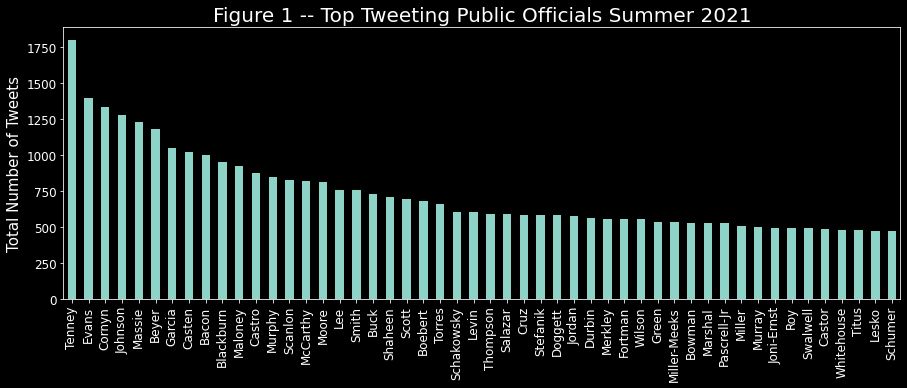

In [ ]:
# -- make a bar plot
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(15, 5))
CountTweetsTop50.plot("LastNames", "screen_name", kind="bar", xlabel="", ylabel="Number of Tweets", legend=False, ax=ax, fontsize=12)
ax.set_ylabel("Total Number of Tweets", fontsize=15)
ax.set_title("Figure 1 -- Top Tweeting Public Officials Summer 2021", fontsize=20)

Figure 1: Figure 1 above plots a barplot for the top tweeting US public officials for the summer of 2021 from highest number of tweets to lowest number of tweets across the x-axis. Overall, there is a considerable difference in range even amongst the top 50 tweeters! 

**Plot the total number of tweets per day for all Congresspersons, Republican Congresspersons, and Democratic Congresspersons.  Be sure to include captions for all plots that you create.**

Plotting Tweets For ALL Congresspersons 

In [ ]:
tweets["time"]

0         2021-06-01T20:13:57-04:00
1         2021-06-02T10:44:48-04:00
2         2021-06-03T10:28:26-04:00
3         2021-06-04T11:04:14-04:00
4         2021-06-07T09:38:06-04:00
                    ...            
110480    2021-08-31T16:23:19-04:00
110481    2021-07-28T14:10:52-04:00
110482    2021-07-29T18:39:27-04:00
110483    2021-08-26T17:56:55-04:00
110484    2021-08-19T14:57:18-04:00
Name: time, Length: 110485, dtype: object

In [ ]:
MonthDay = tweets["time"].str[5:10]

In [ ]:
tweets["MonthDay"] = MonthDay

In [ ]:
tweets["MonthDay"].unique()

array(['06-01', '06-02', '06-03', '06-04', '06-07', '06-08', '06-10',
       '06-11', '06-23', '06-22', '06-20', '06-24', '06-25', '06-28',
       '06-29', '06-30', '07-01', '07-02', '07-04', '07-06', '07-07',
       '07-08', '07-09', '07-14', '07-15', '07-16', '07-19', '07-20',
       '07-21', '07-23', '07-26', '07-27', '07-28', '08-03', '08-04',
       '08-05', '08-09', '08-10', '08-11', '08-16', '08-17', '08-18',
       '08-19', '08-20', '08-23', '08-24', '08-25', '08-26', '08-27',
       '08-30', '08-31', '06-05', '06-06', '06-09', '06-12', '06-21',
       '06-19', '06-26', '06-27', '07-03', '07-05', '07-10', '07-11',
       '07-12', '07-13', '07-17', '07-18', '07-22', '07-24', '07-25',
       '07-29', '07-30', '07-31', '08-01', '08-02', '08-06', '08-07',
       '08-08', '08-12', '08-13', '08-14', '08-15', '08-21', '08-22',
       '08-28', '08-29'], dtype=object)

In [ ]:
tweets

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,LastName,FirstName,MonthDay
0,1399881938110984192,RepMrvan,1346205046036377600,2021-06-01T20:13:57-04:00,https://www.twitter.com/RepMrvan/statuses/1399...,"This grant is proof that when you invest, and ...",Twitter Web App,01,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,Mrvan,Frank,06-01
1,1400101096345976832,RepMrvan,1346205046036377600,2021-06-02T10:44:48-04:00,https://www.twitter.com/RepMrvan/statuses/1400...,I agree! We must continue to ensure that the S...,Twitter Web App,02,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,Mrvan,Frank,06-02
2,1400459366512222208,RepMrvan,1346205046036377600,2021-06-03T10:28:26-04:00,https://www.twitter.com/usacechicago/statuses/...,"RT @usacechicago Today, the U.S. Army Corps of...",Twitter Web App,03,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,Mrvan,Frank,06-03
3,1400830762035916800,RepMrvan,1346205046036377600,2021-06-04T11:04:14-04:00,https://www.twitter.com/RepMrvan/statuses/1400...,"It's great to cut ribbons, but it's what goes ...",Twitter Web App,04,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,Mrvan,Frank,06-04
4,1401896248018341888,RepMrvan,1346205046036377600,2021-06-07T09:38:06-04:00,https://www.twitter.com/RepMrvan/statuses/1401...,It’s important to recognize a collaborative ef...,Twitter Web App,07,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,Mrvan,Frank,06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110480,1432801196130062336,SenSasse,2962923040,2021-08-31T16:23:19-04:00,https://www.twitter.com/SenSasse/statuses/1432...,President Biden kept his promise to the Taliba...,Twitter Web App,31,Nebraska,U.S. Senator,"Sasse, Ben",R,SenSasse,@senatorsasse,x,Sasse,Ben,08-31
110481,1420446672916713472,RepTrentKelly,3317799825,2021-07-28T14:10:52-04:00,https://www.twitter.com/RepTrentKelly/statuses...,"I am pleased to announce that today, the bill ...",Twitter Web App,28,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x,Kelly,Trent,07-28
110482,1420876655212564480,RepTrentKelly,3317799825,2021-07-29T18:39:27-04:00,https://www.twitter.com/HASCRepublicans/status...,"RT @HASCRepublicans .@RepTrentKelly, Ranking M...",Twitter for iPhone,29,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x,Kelly,Trent,07-29
110483,1431012808225968128,RepTrentKelly,3317799825,2021-08-26T17:56:55-04:00,https://www.twitter.com/RepTrentKelly/statuses...,My full statement on the terrorist attacks in ...,Twitter for iPhone,26,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x,Kelly,Trent,08-26


In [ ]:
ALL = tweets.groupby("MonthDay").count()

In [ ]:
ALL

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,LastName,FirstName
MonthDay,,,,,,,,,,,,,,,,,
06-01,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1372,1437,1440,1428
06-02,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1339,1402,1403,1388
06-03,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452,1344,1451,1452,1442
06-04,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1397,1482,1483,1477
06-05,534,534,534,534,534,534,534,534,534,534,534,534,534,511,532,534,530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-27,1351,1351,1351,1351,1351,1351,1351,1351,1351,1351,1351,1351,1351,1278,1350,1351,1344
08-28,653,653,653,653,653,653,653,653,653,653,653,653,653,640,653,653,650
08-29,478,478,478,478,478,478,478,478,478,478,478,478,478,469,478,478,469


In [ ]:
ALL["screen_name"]

MonthDay
06-01    1440
06-02    1403
06-03    1452
06-04    1483
06-05     534
         ... 
08-27    1351
08-28     653
08-29     478
08-30    1342
08-31    1490
Name: screen_name, Length: 86, dtype: int64

In [ ]:
MonthDays = ['06-01', '06-02', '06-03', '06-04', '06-07', '06-08', '06-10',
       '06-11', '06-23', '06-22', '06-20', '06-24', '06-25', '06-28',
       '06-29', '06-30', '07-01', '07-02', '07-04', '07-06', '07-07',
       '07-08', '07-09', '07-14', '07-15', '07-16', '07-19', '07-20',
       '07-21', '07-23', '07-26', '07-27', '07-28', '08-03', '08-04',
       '08-05', '08-09', '08-10', '08-11', '08-16', '08-17', '08-18',
       '08-19', '08-20', '08-23', '08-24', '08-25', '08-26', '08-27',
       '08-30', '08-31', '06-05', '06-06', '06-09', '06-12', '06-21',
       '06-19', '06-26', '06-27', '07-03', '07-05', '07-10', '07-11',
       '07-12', '07-13', '07-17', '07-18', '07-22', '07-24', '07-25',
       '07-29', '07-30', '07-31', '08-01', '08-02', '08-06', '08-07',
       '08-08', '08-12', '08-13', '08-14', '08-15', '08-21', '08-22',
       '08-28', '08-29']

In [ ]:
ALL["MonthDays"] = MonthDays

In [ ]:
ALL

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,LastName,FirstName,MonthDays
MonthDay,,,,,,,,,,,,,,,,,,
06-01,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1372,1437,1440,1428,06-01
06-02,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1339,1402,1403,1388,06-02
06-03,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452,1344,1451,1452,1442,06-03
06-04,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1397,1482,1483,1477,06-04
06-05,534,534,534,534,534,534,534,534,534,534,534,534,534,511,532,534,530,06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-27,1351,1351,1351,1351,1351,1351,1351,1351,1351,1351,1351,1351,1351,1278,1350,1351,1344,08-15
08-28,653,653,653,653,653,653,653,653,653,653,653,653,653,640,653,653,650,08-21
08-29,478,478,478,478,478,478,478,478,478,478,478,478,478,469,478,478,469,08-22


Text(0.5, 1.0, 'Figure 2 -- Total # of Tweets Per Day Across Summer 2021 For All Congresspersons')

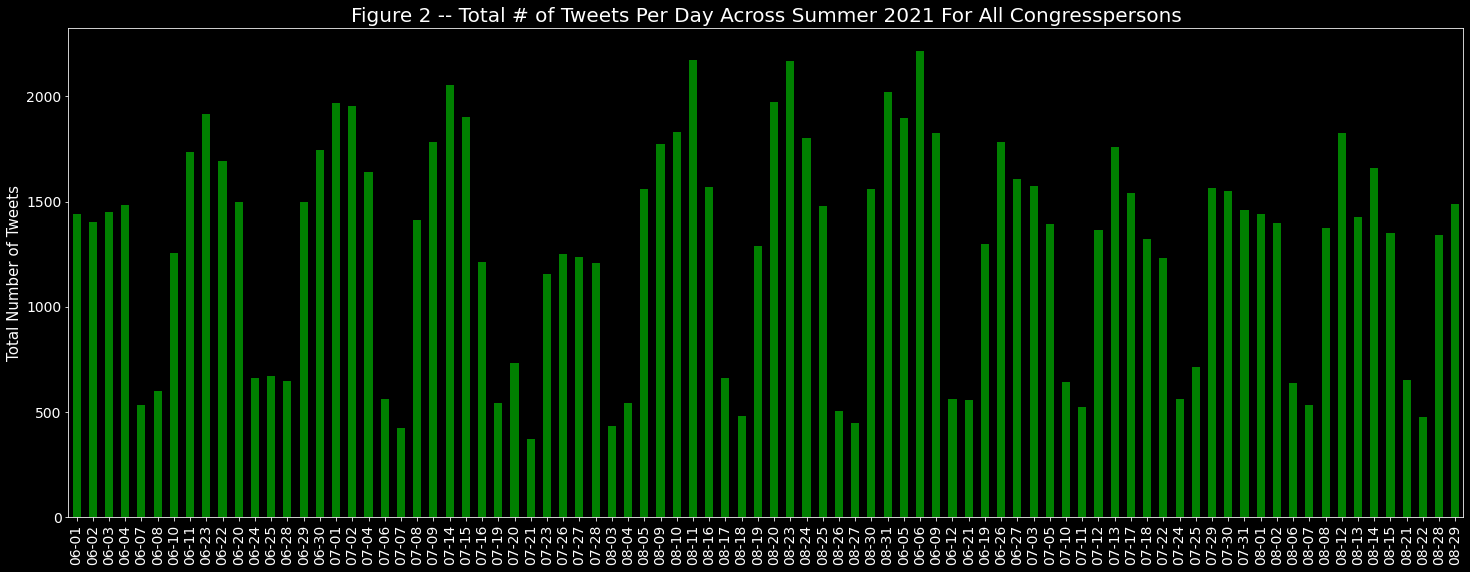

In [ ]:
# -- make a bar plot
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(25, 9))

ALL.plot("MonthDays", "text", kind="bar", xlabel="", ylabel="Number of Tweets Per Day", legend=False, ax=ax, fontsize=14, color="green")
ax.set_ylabel("Total Number of Tweets", fontsize=15)
ax.set_title("Figure 2 -- Total # of Tweets Per Day Across Summer 2021 For All Congresspersons", fontsize=20)

**(GGD: OK, any patterns?)**

Figure 2: Figure 2 above represents the total number of tweets per day across summer 2021 for all congresspersons. The ex axis ranges from June 1st until August 29th accordingly while the data is shown in green with the total number of tweets on a respective day shown on the y axis. Overall, there is a considerable variability in the total number of tweets by congresspersons daily throughout summer 2021.

**Total # of Tweets for Democatic Congresspersons Summer 2021**

---



In [ ]:
tweetsDEM

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook
0,1399881938110984192,RepMrvan,1346205046036377600,2021-06-01T20:13:57-04:00,https://www.twitter.com/RepMrvan/statuses/1399...,"This grant is proof that when you invest, and ...",Twitter Web App,01,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x
1,1400101096345976832,RepMrvan,1346205046036377600,2021-06-02T10:44:48-04:00,https://www.twitter.com/RepMrvan/statuses/1400...,I agree! We must continue to ensure that the S...,Twitter Web App,02,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x
2,1400459366512222208,RepMrvan,1346205046036377600,2021-06-03T10:28:26-04:00,https://www.twitter.com/usacechicago/statuses/...,"RT @usacechicago Today, the U.S. Army Corps of...",Twitter Web App,03,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x
3,1400830762035916800,RepMrvan,1346205046036377600,2021-06-04T11:04:14-04:00,https://www.twitter.com/RepMrvan/statuses/1400...,"It's great to cut ribbons, but it's what goes ...",Twitter Web App,04,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x
4,1401896248018341888,RepMrvan,1346205046036377600,2021-06-07T09:38:06-04:00,https://www.twitter.com/RepMrvan/statuses/1401...,It’s important to recognize a collaborative ef...,Twitter Web App,07,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110445,1411420142337134592,StricklandforWA,1206654366758785024,2021-07-03T16:22:39-04:00,https://www.twitter.com/StricklandforWA/status...,Please be safe this weekend! https://komonews...,Twitter for iPhone,03,Washington 10th District,U.S. Prepresentative,"Strickland, Marilyn",D,StricklandforWA,@stricklandforwa,x
110446,1417553011799470080,StricklandforWA,1206654366758785024,2021-07-20T14:32:29-04:00,https://www.twitter.com/StricklandforWA/status...,My friend and colleague @AndyKimNJ (NJ-3) is b...,Twitter for iPhone,20,Washington 10th District,U.S. Prepresentative,"Strickland, Marilyn",D,StricklandforWA,@stricklandforwa,x
110447,1427629580957925376,StricklandforWA,1206654366758785024,2021-08-17T09:53:10-04:00,https://www.twitter.com/StricklandforWA/status...,Let’s put everything aside and help people. Vo...,Twitter for iPhone,17,Washington 10th District,U.S. Prepresentative,"Strickland, Marilyn",D,StricklandforWA,@stricklandforwa,x
110448,1409305730285461504,AlLawsonJr,88291132,2021-06-27T20:20:44-04:00,https://www.twitter.com/AlLawsonJr/statuses/14...,"We celebrate you Dr Humphries, you truly built...",Twitter for iPhone,27,Florida 5th District,U.S. Prepresentative,"Lawson, Al",D,AlLawsonJr,@allawsonjr,x


In [ ]:
tweetsDEM["MonthDay"]=tweetsDEM["time"].str[5:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tweetsDEM

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,MonthDay
0,1399881938110984192,RepMrvan,1346205046036377600,2021-06-01T20:13:57-04:00,https://www.twitter.com/RepMrvan/statuses/1399...,"This grant is proof that when you invest, and ...",Twitter Web App,01,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,06-01
1,1400101096345976832,RepMrvan,1346205046036377600,2021-06-02T10:44:48-04:00,https://www.twitter.com/RepMrvan/statuses/1400...,I agree! We must continue to ensure that the S...,Twitter Web App,02,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,06-02
2,1400459366512222208,RepMrvan,1346205046036377600,2021-06-03T10:28:26-04:00,https://www.twitter.com/usacechicago/statuses/...,"RT @usacechicago Today, the U.S. Army Corps of...",Twitter Web App,03,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,06-03
3,1400830762035916800,RepMrvan,1346205046036377600,2021-06-04T11:04:14-04:00,https://www.twitter.com/RepMrvan/statuses/1400...,"It's great to cut ribbons, but it's what goes ...",Twitter Web App,04,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,06-04
4,1401896248018341888,RepMrvan,1346205046036377600,2021-06-07T09:38:06-04:00,https://www.twitter.com/RepMrvan/statuses/1401...,It’s important to recognize a collaborative ef...,Twitter Web App,07,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110445,1411420142337134592,StricklandforWA,1206654366758785024,2021-07-03T16:22:39-04:00,https://www.twitter.com/StricklandforWA/status...,Please be safe this weekend! https://komonews...,Twitter for iPhone,03,Washington 10th District,U.S. Prepresentative,"Strickland, Marilyn",D,StricklandforWA,@stricklandforwa,x,07-03
110446,1417553011799470080,StricklandforWA,1206654366758785024,2021-07-20T14:32:29-04:00,https://www.twitter.com/StricklandforWA/status...,My friend and colleague @AndyKimNJ (NJ-3) is b...,Twitter for iPhone,20,Washington 10th District,U.S. Prepresentative,"Strickland, Marilyn",D,StricklandforWA,@stricklandforwa,x,07-20
110447,1427629580957925376,StricklandforWA,1206654366758785024,2021-08-17T09:53:10-04:00,https://www.twitter.com/StricklandforWA/status...,Let’s put everything aside and help people. Vo...,Twitter for iPhone,17,Washington 10th District,U.S. Prepresentative,"Strickland, Marilyn",D,StricklandforWA,@stricklandforwa,x,08-17
110448,1409305730285461504,AlLawsonJr,88291132,2021-06-27T20:20:44-04:00,https://www.twitter.com/AlLawsonJr/statuses/14...,"We celebrate you Dr Humphries, you truly built...",Twitter for iPhone,27,Florida 5th District,U.S. Prepresentative,"Lawson, Al",D,AlLawsonJr,@allawsonjr,x,06-27


In [ ]:
DEM = tweetsDEM.groupby("MonthDay").count()

In [ ]:
DEM.sort_values(by="MonthDay", ascending=True)

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook
MonthDay,,,,,,,,,,,,,,,
06-01,865,865,865,865,865,865,865,865,865,865,865,865,865,842,862
06-02,786,786,786,786,786,786,786,786,786,786,786,786,786,766,785
06-03,846,846,846,846,846,846,846,846,846,846,846,846,846,818,845
06-04,886,886,886,886,886,886,886,886,886,886,886,886,886,853,885
06-05,274,274,274,274,274,274,274,274,274,274,274,274,274,265,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-27,806,806,806,806,806,806,806,806,806,806,806,806,806,777,805
08-28,370,370,370,370,370,370,370,370,370,370,370,370,370,369,370
08-29,232,232,232,232,232,232,232,232,232,232,232,232,232,229,232


In [ ]:
DEM

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook
MonthDay,,,,,,,,,,,,,,,
06-01,865,865,865,865,865,865,865,865,865,865,865,865,865,842,862
06-02,786,786,786,786,786,786,786,786,786,786,786,786,786,766,785
06-03,846,846,846,846,846,846,846,846,846,846,846,846,846,818,845
06-04,886,886,886,886,886,886,886,886,886,886,886,886,886,853,885
06-05,274,274,274,274,274,274,274,274,274,274,274,274,274,265,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-27,806,806,806,806,806,806,806,806,806,806,806,806,806,777,805
08-28,370,370,370,370,370,370,370,370,370,370,370,370,370,369,370
08-29,232,232,232,232,232,232,232,232,232,232,232,232,232,229,232


**(GGD: again, can use the index.  "Hard-coding" things like names and dates is not reproducible)**

In [ ]:
MonthDays = ['06-01', '06-02', '06-03', '06-04', '06-07', '06-08', '06-10',
       '06-11', '06-23', '06-22', '06-20', '06-24', '06-25', '06-28',
       '06-29', '06-30', '07-01', '07-02', '07-04', '07-06', '07-07',
       '07-08', '07-09', '07-14', '07-15', '07-16', '07-19', '07-20',
       '07-21', '07-23', '07-26', '07-27', '07-28', '08-03', '08-04',
       '08-05', '08-09', '08-10', '08-11', '08-16', '08-17', '08-18',
       '08-19', '08-20', '08-23', '08-24', '08-25', '08-26', '08-27',
       '08-30', '08-31', '06-05', '06-06', '06-09', '06-12', '06-21',
       '06-19', '06-26', '06-27', '07-03', '07-05', '07-10', '07-11',
       '07-12', '07-13', '07-17', '07-18', '07-22', '07-24', '07-25',
       '07-29', '07-30', '07-31', '08-01', '08-02', '08-06', '08-07',
       '08-08', '08-12', '08-13', '08-14', '08-15', '08-21', '08-22',
       '08-28', '08-29']

In [ ]:
MonthDays

['06-01',
 '06-02',
 '06-03',
 '06-04',
 '06-07',
 '06-08',
 '06-10',
 '06-11',
 '06-23',
 '06-22',
 '06-20',
 '06-24',
 '06-25',
 '06-28',
 '06-29',
 '06-30',
 '07-01',
 '07-02',
 '07-04',
 '07-06',
 '07-07',
 '07-08',
 '07-09',
 '07-14',
 '07-15',
 '07-16',
 '07-19',
 '07-20',
 '07-21',
 '07-23',
 '07-26',
 '07-27',
 '07-28',
 '08-03',
 '08-04',
 '08-05',
 '08-09',
 '08-10',
 '08-11',
 '08-16',
 '08-17',
 '08-18',
 '08-19',
 '08-20',
 '08-23',
 '08-24',
 '08-25',
 '08-26',
 '08-27',
 '08-30',
 '08-31',
 '06-05',
 '06-06',
 '06-09',
 '06-12',
 '06-21',
 '06-19',
 '06-26',
 '06-27',
 '07-03',
 '07-05',
 '07-10',
 '07-11',
 '07-12',
 '07-13',
 '07-17',
 '07-18',
 '07-22',
 '07-24',
 '07-25',
 '07-29',
 '07-30',
 '07-31',
 '08-01',
 '08-02',
 '08-06',
 '08-07',
 '08-08',
 '08-12',
 '08-13',
 '08-14',
 '08-15',
 '08-21',
 '08-22',
 '08-28',
 '08-29']

In [ ]:
DEM["MonthDays"]=MonthDays

In [ ]:
DEM

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,MonthDays
MonthDay,,,,,,,,,,,,,,,,
06-01,865,865,865,865,865,865,865,865,865,865,865,865,865,842,862,06-01
06-02,786,786,786,786,786,786,786,786,786,786,786,786,786,766,785,06-02
06-03,846,846,846,846,846,846,846,846,846,846,846,846,846,818,845,06-03
06-04,886,886,886,886,886,886,886,886,886,886,886,886,886,853,885,06-04
06-05,274,274,274,274,274,274,274,274,274,274,274,274,274,265,272,06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-27,806,806,806,806,806,806,806,806,806,806,806,806,806,777,805,08-15
08-28,370,370,370,370,370,370,370,370,370,370,370,370,370,369,370,08-21
08-29,232,232,232,232,232,232,232,232,232,232,232,232,232,229,232,08-22


Text(0.5, 1.0, 'Figure 3 -- Total # of Tweets Per Day Across Summer 2021 For Democratic Congresspersons')

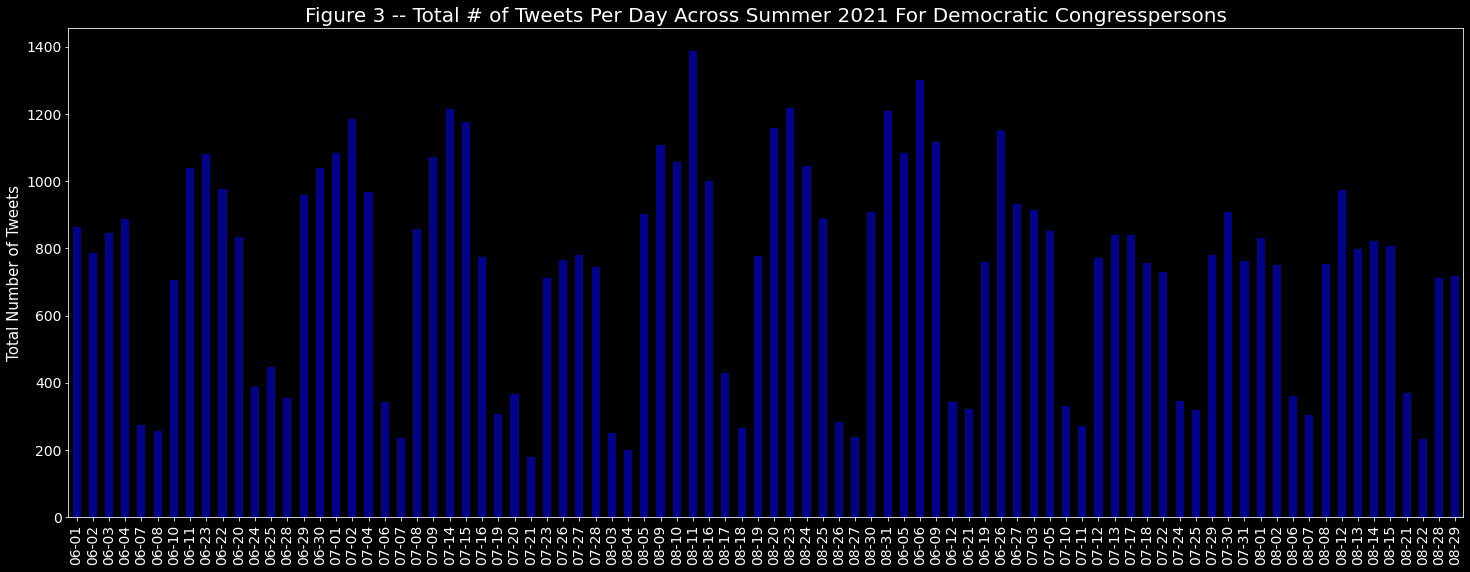

In [ ]:
# -- make a bar plot for democratic congresspersons tweets 
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(25, 9))

DEM.plot("MonthDays", "text", kind="bar", xlabel="", ylabel="Number of Tweets Per Day", legend=False, ax=ax, fontsize=14, color="darkblue")
ax.set_ylabel("Total Number of Tweets", fontsize=15)
ax.set_title("Figure 3 -- Total # of Tweets Per Day Across Summer 2021 For Democratic Congresspersons", fontsize=20)

Figure 3: Figure 3 above represents the total number of tweets per day across summer 2021 for democratic congresspersons. The x axis ranges from June 1st until August 29th accordingly while the data is shown in blue with the total number of tweets on a respective day shown on the y axis. Overall, there is a considerable variability in the total number of tweets by democratic congresspersons daily throughout summer 2021 with the peak daily tweet day occuring on August 11th, 2021.

**Total # of Tweets Republican Congresspersons Summer 2021**

In [ ]:
tweetsREP

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook
57,1399857288094044160,RepMMM,1345807954604412928,2021-06-01T18:36:00-04:00,https://www.twitter.com/RepMMM/statuses/139985...,The average Iowa dairy cow produces 7 gallons ...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x
58,1399835897269473280,RepMMM,1345807954604412928,2021-06-01T17:11:00-04:00,https://www.twitter.com/RepMMM/statuses/139983...,Congratulations to Christa Andersen of Davenpo...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x
59,1399825327719804928,RepMMM,1345807954604412928,2021-06-01T16:29:00-04:00,https://www.twitter.com/RepMMM/statuses/139982...,ICYMI: I was proud to join an incredible bipar...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x
60,1399795883739385856,RepMMM,1345807954604412928,2021-06-01T14:32:00-04:00,https://www.twitter.com/RepMMM/statuses/139979...,Great to visit with the folks at @vermeercorp ...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x
61,1399767194582409216,RepMMM,1345807954604412928,2021-06-01T12:38:00-04:00,https://www.twitter.com/RepMMM/statuses/139976...,ICYMI: I recently joined a letter to @POTUS as...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110480,1432801196130062336,SenSasse,2962923040,2021-08-31T16:23:19-04:00,https://www.twitter.com/SenSasse/statuses/1432...,President Biden kept his promise to the Taliba...,Twitter Web App,31,Nebraska,U.S. Senator,"Sasse, Ben",R,SenSasse,@senatorsasse,x
110481,1420446672916713472,RepTrentKelly,3317799825,2021-07-28T14:10:52-04:00,https://www.twitter.com/RepTrentKelly/statuses...,"I am pleased to announce that today, the bill ...",Twitter Web App,28,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x
110482,1420876655212564480,RepTrentKelly,3317799825,2021-07-29T18:39:27-04:00,https://www.twitter.com/HASCRepublicans/status...,"RT @HASCRepublicans .@RepTrentKelly, Ranking M...",Twitter for iPhone,29,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x
110483,1431012808225968128,RepTrentKelly,3317799825,2021-08-26T17:56:55-04:00,https://www.twitter.com/RepTrentKelly/statuses...,My full statement on the terrorist attacks in ...,Twitter for iPhone,26,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x


In [ ]:
MonthDay = tweetsREP["time"].str[5:10]

In [ ]:
MonthDay

57        06-01
58        06-01
59        06-01
60        06-01
61        06-01
          ...  
110480    08-31
110481    07-28
110482    07-29
110483    08-26
110484    08-19
Name: time, Length: 46500, dtype: object

In [ ]:
tweetsREP["MonthDay"] = MonthDay

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tweetsREP

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,MonthDay
57,1399857288094044160,RepMMM,1345807954604412928,2021-06-01T18:36:00-04:00,https://www.twitter.com/RepMMM/statuses/139985...,The average Iowa dairy cow produces 7 gallons ...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x,06-01
58,1399835897269473280,RepMMM,1345807954604412928,2021-06-01T17:11:00-04:00,https://www.twitter.com/RepMMM/statuses/139983...,Congratulations to Christa Andersen of Davenpo...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x,06-01
59,1399825327719804928,RepMMM,1345807954604412928,2021-06-01T16:29:00-04:00,https://www.twitter.com/RepMMM/statuses/139982...,ICYMI: I was proud to join an incredible bipar...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x,06-01
60,1399795883739385856,RepMMM,1345807954604412928,2021-06-01T14:32:00-04:00,https://www.twitter.com/RepMMM/statuses/139979...,Great to visit with the folks at @vermeercorp ...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x,06-01
61,1399767194582409216,RepMMM,1345807954604412928,2021-06-01T12:38:00-04:00,https://www.twitter.com/RepMMM/statuses/139976...,ICYMI: I recently joined a letter to @POTUS as...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x,06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110480,1432801196130062336,SenSasse,2962923040,2021-08-31T16:23:19-04:00,https://www.twitter.com/SenSasse/statuses/1432...,President Biden kept his promise to the Taliba...,Twitter Web App,31,Nebraska,U.S. Senator,"Sasse, Ben",R,SenSasse,@senatorsasse,x,08-31
110481,1420446672916713472,RepTrentKelly,3317799825,2021-07-28T14:10:52-04:00,https://www.twitter.com/RepTrentKelly/statuses...,"I am pleased to announce that today, the bill ...",Twitter Web App,28,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x,07-28
110482,1420876655212564480,RepTrentKelly,3317799825,2021-07-29T18:39:27-04:00,https://www.twitter.com/HASCRepublicans/status...,"RT @HASCRepublicans .@RepTrentKelly, Ranking M...",Twitter for iPhone,29,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x,07-29
110483,1431012808225968128,RepTrentKelly,3317799825,2021-08-26T17:56:55-04:00,https://www.twitter.com/RepTrentKelly/statuses...,My full statement on the terrorist attacks in ...,Twitter for iPhone,26,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x,08-26


In [ ]:
MonthDays = ['06-01', '06-02', '06-03', '06-04', '06-07', '06-08', '06-10',
       '06-11', '06-23', '06-22', '06-20', '06-24', '06-25', '06-28',
       '06-29', '06-30', '07-01', '07-02', '07-04', '07-06', '07-07',
       '07-08', '07-09', '07-14', '07-15', '07-16', '07-19', '07-20',
       '07-21', '07-23', '07-26', '07-27', '07-28', '08-03', '08-04',
       '08-05', '08-09', '08-10', '08-11', '08-16', '08-17', '08-18',
       '08-19', '08-20', '08-23', '08-24', '08-25', '08-26', '08-27',
       '08-30', '08-31', '06-05', '06-06', '06-09', '06-12', '06-21',
       '06-19', '06-26', '06-27', '07-03', '07-05', '07-10', '07-11',
       '07-12', '07-13', '07-17', '07-18', '07-22', '07-24', '07-25',
       '07-29', '07-30', '07-31', '08-01', '08-02', '08-06', '08-07',
       '08-08', '08-12', '08-13', '08-14', '08-15', '08-21', '08-22',
       '08-28', '08-29']

In [ ]:
MonthDays

['06-01',
 '06-02',
 '06-03',
 '06-04',
 '06-07',
 '06-08',
 '06-10',
 '06-11',
 '06-23',
 '06-22',
 '06-20',
 '06-24',
 '06-25',
 '06-28',
 '06-29',
 '06-30',
 '07-01',
 '07-02',
 '07-04',
 '07-06',
 '07-07',
 '07-08',
 '07-09',
 '07-14',
 '07-15',
 '07-16',
 '07-19',
 '07-20',
 '07-21',
 '07-23',
 '07-26',
 '07-27',
 '07-28',
 '08-03',
 '08-04',
 '08-05',
 '08-09',
 '08-10',
 '08-11',
 '08-16',
 '08-17',
 '08-18',
 '08-19',
 '08-20',
 '08-23',
 '08-24',
 '08-25',
 '08-26',
 '08-27',
 '08-30',
 '08-31',
 '06-05',
 '06-06',
 '06-09',
 '06-12',
 '06-21',
 '06-19',
 '06-26',
 '06-27',
 '07-03',
 '07-05',
 '07-10',
 '07-11',
 '07-12',
 '07-13',
 '07-17',
 '07-18',
 '07-22',
 '07-24',
 '07-25',
 '07-29',
 '07-30',
 '07-31',
 '08-01',
 '08-02',
 '08-06',
 '08-07',
 '08-08',
 '08-12',
 '08-13',
 '08-14',
 '08-15',
 '08-21',
 '08-22',
 '08-28',
 '08-29']

In [ ]:
REP = tweetsREP.groupby("MonthDay").count()

In [ ]:
REP["MonthDays"] = MonthDays

In [ ]:
REP

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,MonthDays
MonthDay,,,,,,,,,,,,,,,,
06-01,572,572,572,572,572,572,572,572,572,572,572,572,572,527,572,06-01
06-02,614,614,614,614,614,614,614,614,614,614,614,614,614,570,614,06-02
06-03,602,602,602,602,602,602,602,602,602,602,602,602,602,522,602,06-03
06-04,595,595,595,595,595,595,595,595,595,595,595,595,595,542,595,06-04
06-05,259,259,259,259,259,259,259,259,259,259,259,259,259,245,259,06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-27,544,544,544,544,544,544,544,544,544,544,544,544,544,500,544,08-15
08-28,282,282,282,282,282,282,282,282,282,282,282,282,282,270,282,08-21
08-29,246,246,246,246,246,246,246,246,246,246,246,246,246,240,246,08-22


In [ ]:
REP = REP.sort_values(by="MonthDay", ascending=True)

In [ ]:
REP

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,MonthDays
MonthDay,,,,,,,,,,,,,,,,
06-01,572,572,572,572,572,572,572,572,572,572,572,572,572,527,572,06-01
06-02,614,614,614,614,614,614,614,614,614,614,614,614,614,570,614,06-02
06-03,602,602,602,602,602,602,602,602,602,602,602,602,602,522,602,06-03
06-04,595,595,595,595,595,595,595,595,595,595,595,595,595,542,595,06-04
06-05,259,259,259,259,259,259,259,259,259,259,259,259,259,245,259,06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-27,544,544,544,544,544,544,544,544,544,544,544,544,544,500,544,08-15
08-28,282,282,282,282,282,282,282,282,282,282,282,282,282,270,282,08-21
08-29,246,246,246,246,246,246,246,246,246,246,246,246,246,240,246,08-22


Text(0.5, 1.0, 'Figure 4 -- Total # of Tweets Per Day Across Summer 2021 For Republican Congresspersons')

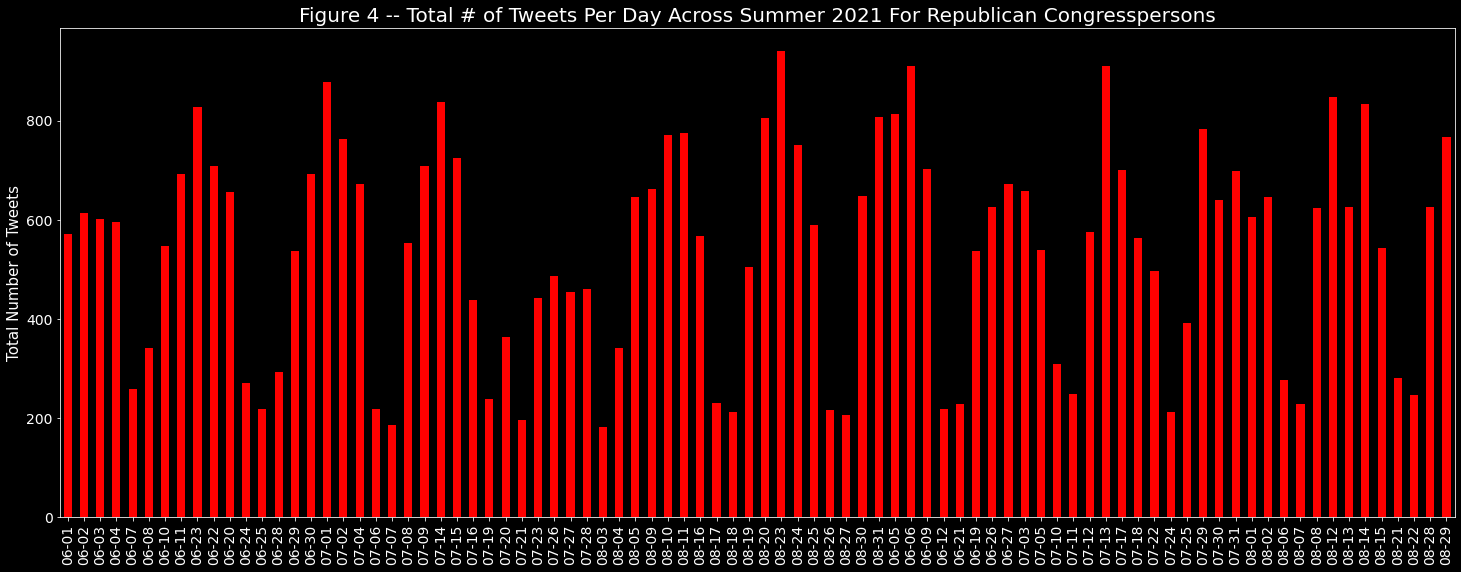

In [ ]:
# -- make a bar plot for republican congresspersons tweets 
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(25, 9))

REP.plot("MonthDays", "text", kind="bar", xlabel="", ylabel="Number of Tweets Per Day", legend=False, ax=ax, fontsize=14, color="red")


ax.set_ylabel("Total Number of Tweets", fontsize=15)
ax.set_title("Figure 4 -- Total # of Tweets Per Day Across Summer 2021 For Republican Congresspersons", fontsize=20)

Figure 4: Figure 4 above represents the total number of tweets per day across summer 2021 for Republican congresspersons. The x axis ranges from June 1st until August 29th accordingly while the data is shown in red with the total number of tweets on a respective day shown on the y axis. Overall, there is a considerable variability in the total number of tweets by Republican congresspersons daily throughout summer 2021 with the peak daily tweets day occuring on August 20th, 2021.

**Using <u>only</u> information contained in the `tweets` DataFrame, what day was the IPCC Sixth Assessment Report released? (GGD: OK, but how did you get the date?  See solutions])**

In [ ]:
tweets['text'].str.contains("IPCC").unique()

array([False,  True])

In [ ]:
IPCC = tweets['text'].str.contains("IPCC")

In [ ]:
IPCC

0         False
1         False
2         False
3         False
4         False
          ...  
110480    False
110481    False
110482    False
110483    False
110484    False
Name: text, Length: 110485, dtype: bool

In [ ]:
Climate = tweets[IPCC]

In [ ]:
Climate

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,LastName,FirstName,MonthDay
1318,1424719001922457600,RepMaryMiller,1343656635907125248,2021-08-09T09:07:34-04:00,https://www.twitter.com/RepMaryMiller/statuses...,Is this you? https://twitter.com/climateenvoy/...,Twitter for iPhone,09,Illinois 15th District,U.S. Prepresentative,"Miller, Mary",R,RepMaryMiller,@MaryMillerForCongress,x,Miller,Mary,08-09
3471,1424824043358797824,SenatorHick,1318728336923787264,2021-08-09T16:04:58-04:00,https://www.twitter.com/SenatorHick/statuses/1...,Denver had the worst air quality in the world ...,Twitter Web App,09,Colorado,U.S. Senator,"Hickenlooper, John",D,SenatorHick,@senatorhick,x,Hickenlooper,John,08-09
6051,1424761555971985408,TeresaForNM,1128147829606600704,2021-08-09T11:56:40-04:00,https://www.twitter.com/SpeakerPelosi/statuses...,RT @SpeakerPelosi The @IPCC_CH shows the unden...,Twitter for iPhone,09,New Mexico 3rd District,U.S. Prepresentative,"Fernandez, Teresa Leger",D,TeresaForNM,@teresafornm,x,Fernandez,Teresa Leger,08-09
6052,1424760729484283904,TeresaForNM,1128147829606600704,2021-08-09T11:53:23-04:00,https://www.twitter.com/TeresaForNM/statuses/1...,"The IPCC Report is very clear, we have to act ...",Twitter for iPhone,09,New Mexico 3rd District,U.S. Prepresentative,"Fernandez, Teresa Leger",D,TeresaForNM,@teresafornm,x,Fernandez,Teresa Leger,08-09
7438,1419743626696003584,RepCasten,1083472286089396224,2021-07-26T15:37:12-04:00,https://www.twitter.com/RepCasten/statuses/141...,"Today, the @IPCC_CH begins their meetings to f...",Twitter Web App,26,Illinois 6th District,U.S. Prepresentative,"Casten, Sean",D,RepCasten,@repseancasten,x,Casten,Sean,07-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98910,1424744322629517312,SpeakerPelosi,15764644,2021-08-09T10:48:11-04:00,https://www.twitter.com/SpeakerPelosi/statuses...,The @IPCC_CH shows the undeniable truth: the #...,Twitter for iPhone,09,California 12th District,U.S. Prepresentative,"Pelosi, Nancy",D,SpeakerPelosi,@speakerpelosi,x,Pelosi,Nancy,08-09
99940,1424729985005326336,chelliepingree,14984637,2021-08-09T09:51:13-04:00,https://www.twitter.com/chelliepingree/statuse...,The new IPCC report is another dire warning th...,Twitter Web App,09,Maine 1st District,U.S. Prepresentative,"Pingree, Chellie",D,chelliepingree,@chelliepingre,x,Pingree,Chellie,08-09
103236,1424837777217277952,RepEscobar,1075517806551154688,2021-08-09T16:59:32-04:00,https://www.twitter.com/RepEscobar/statuses/14...,"We have two options.\n\nEither we make urgent,...",Twitter Web App,09,Texas 16th District,U.S. Prepresentative,"Escobar, Veronica",D,RepEscobar,@vgescobar915,x,Escobar,Veronica,08-09
108881,1424786490123554816,RepAOC,1079104563280527360,2021-08-09T13:35:45-04:00,https://www.twitter.com/afreedma/statuses/1424...,RT @afreedma This isn't getting enough attenti...,Twitter Web App,09,New York 14th District,U.S. Prepresentative,"Ocasio-Cortez, Alexandria",D,RepAOC,@aoc,x,Ocasio-Cortez,Alexandria,08-09


In [ ]:
Climate['MonthDay'].unique()

array(['08-09', '07-26', '08-10', '08-11', '08-13', '08-15', '08-19',
       '08-23', '08-24', '08-30', '08-31', '08-12', '08-16', '08-06',
       '08-27', '08-17', '08-14', '08-20', '08-21', '08-08'], dtype=object)

In [ ]:
Climate['text'].unique()

array(["Is this you? https://twitter.com/climateenvoy/status/1424710673800572935 http://pbs.twimg.com/media/E8WeYZOXoAAaaVY.jpg QT @ClimateEnvoy Today's report from the @IPCC_CH shows that we cannot afford further delay. The science has been certain for decades, but the latest report makes it abundantly clear – the climate crisis is not only here, it is growing increasingly severe.",
       "Denver had the worst air quality in the world on Saturday. I-70 is closed from catastrophic mudslides. Western Colorado is dealing with extreme drought. The @IPCC_CH's message is one we can see all around us: climate change is here. We can't wait to act. https://twitter.com/IPCC_CH/status/1424654466566037504 QT @IPCC_CH The #IPCC released its latest #ClimateReport today, #ClimateChange 2021: the Physical Science Basis.\n\n“The role of human influence on the climate system is undisputed.” – Working Group I Co-Chair @valmasdel \n\nReport ➡️  https://www.ipcc.ch/report/ar6/wg1/\n\nWatch the video, 🎥 ⬇

**** **The IPCC report was released on  August 9th, 2021** ****



---



---




**What fraction of tweets by each party mentioned COVID in the summer of 2021?  Be sure to articulate any assumptions made when determining this number. (GGD: -1 [there were a few more assumptions made specifically about things like capitalization and associated terms])** 

In [ ]:
DEMCOVID = tweetsDEM["text"].str.contains("COVID")

In [ ]:
DEMCOV = tweetsDEM[DEMCOVID]

In [ ]:
DEMCOV

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,MonthDay
1486,1402417155811987456,RepBourdeaux,1343620645452595200,2021-06-08T20:08:00-04:00,https://www.twitter.com/RepBourdeaux/statuses/...,"Vaccinations are up, #COVID cases are down. Jo...",Twitter Web App,08,Georgia 7th District,U.S. Prepresentative,"Bourdeaux, Carolyn",D,RepBourdeaux,@carolyn4congress,x,06-08
1515,1403732717628440576,RepBourdeaux,1343620645452595200,2021-06-12T11:15:34-04:00,https://www.twitter.com/RepBourdeaux/statuses/...,🚨BIG NEWS 🚨My #COVID Task Force recognized a n...,Twitter Web App,12,Georgia 7th District,U.S. Prepresentative,"Bourdeaux, Carolyn",D,RepBourdeaux,@carolyn4congress,x,06-12
1518,1407861278417162240,RepBourdeaux,1343620645452595200,2021-06-23T20:41:00-04:00,https://www.twitter.com/RepBourdeaux/statuses/...,"Early on in the pandemic, it became clear that...",Twitter Web App,23,Georgia 7th District,U.S. Prepresentative,"Bourdeaux, Carolyn",D,RepBourdeaux,@carolyn4congress,x,06-23
1531,1407055720529350656,RepBourdeaux,1343620645452595200,2021-06-21T15:20:00-04:00,https://www.twitter.com/RepBourdeaux/statuses/...,"Through no fault of their own, many Georgians ...",Twitter Media Studio,21,Georgia 7th District,U.S. Prepresentative,"Bourdeaux, Carolyn",D,RepBourdeaux,@carolyn4congress,x,06-21
1576,1409986532199612416,RepBourdeaux,1343620645452595200,2021-06-29T17:26:00-04:00,https://www.twitter.com/RepBourdeaux/statuses/...,Schooling kids from home during #COVID was par...,Twitter Web App,29,Georgia 7th District,U.S. Prepresentative,"Bourdeaux, Carolyn",D,RepBourdeaux,@carolyn4congress,x,06-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109662,1418205615164383232,SanfordBishop,249410485,2021-07-22T09:45:42-04:00,https://www.twitter.com/SanfordBishop/statuses...,.@USDA is accepting applications through Oct. ...,Twitter Web App,22,Georgia 2nd District,U.S. Prepresentative,"Bishop Jr., Sanford D.",D,SanfordBishop,@repsanfordbishop,x,07-22
109663,1426172464179159040,SanfordBishop,249410485,2021-08-13T09:23:07-04:00,https://www.twitter.com/SanfordBishop/statuses...,COVID &amp; Delta variant are straining health...,Twitter Web App,13,Georgia 2nd District,U.S. Prepresentative,"Bishop Jr., Sanford D.",D,SanfordBishop,@repsanfordbishop,x,08-13
109868,1414966130393985024,CatherineForNV,3145735852,2021-07-13T11:13:08-04:00,https://www.twitter.com/CatherineForNV/statuse...,The COVID-19 vaccine is safe and free. Communi...,Twitter Web App,13,Nevada,U.S. Senator,"Cortez Mastro, Catherine",D,CatherineForNV,@sencortezmasto,x,07-13
109871,1416114747460706304,CatherineForNV,3145735852,2021-07-16T15:17:20-04:00,https://www.twitter.com/CatherineForNV/statuse...,I’m focused on reaching out to every corner of...,Twitter Web App,16,Nevada,U.S. Senator,"Cortez Mastro, Catherine",D,CatherineForNV,@sencortezmasto,x,07-16


In [ ]:
len(DEMCOV)

3952

In [ ]:
len(tweetsDEM)

63676

In [ ]:
len(DEMCOV) / len(tweetsDEM) 

0.0620642000125636

In [ ]:
REPCOVID = tweetsREP["text"].str.contains("COVID")

In [ ]:
REPCOV = tweetsREP[REPCOVID]

In [ ]:
tweetsREP

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,MonthDay
57,1399857288094044160,RepMMM,1345807954604412928,2021-06-01T18:36:00-04:00,https://www.twitter.com/RepMMM/statuses/139985...,The average Iowa dairy cow produces 7 gallons ...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x,06-01
58,1399835897269473280,RepMMM,1345807954604412928,2021-06-01T17:11:00-04:00,https://www.twitter.com/RepMMM/statuses/139983...,Congratulations to Christa Andersen of Davenpo...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x,06-01
59,1399825327719804928,RepMMM,1345807954604412928,2021-06-01T16:29:00-04:00,https://www.twitter.com/RepMMM/statuses/139982...,ICYMI: I was proud to join an incredible bipar...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x,06-01
60,1399795883739385856,RepMMM,1345807954604412928,2021-06-01T14:32:00-04:00,https://www.twitter.com/RepMMM/statuses/139979...,Great to visit with the folks at @vermeercorp ...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x,06-01
61,1399767194582409216,RepMMM,1345807954604412928,2021-06-01T12:38:00-04:00,https://www.twitter.com/RepMMM/statuses/139976...,ICYMI: I recently joined a letter to @POTUS as...,TweetDeck,01,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x,06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110480,1432801196130062336,SenSasse,2962923040,2021-08-31T16:23:19-04:00,https://www.twitter.com/SenSasse/statuses/1432...,President Biden kept his promise to the Taliba...,Twitter Web App,31,Nebraska,U.S. Senator,"Sasse, Ben",R,SenSasse,@senatorsasse,x,08-31
110481,1420446672916713472,RepTrentKelly,3317799825,2021-07-28T14:10:52-04:00,https://www.twitter.com/RepTrentKelly/statuses...,"I am pleased to announce that today, the bill ...",Twitter Web App,28,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x,07-28
110482,1420876655212564480,RepTrentKelly,3317799825,2021-07-29T18:39:27-04:00,https://www.twitter.com/HASCRepublicans/status...,"RT @HASCRepublicans .@RepTrentKelly, Ranking M...",Twitter for iPhone,29,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x,07-29
110483,1431012808225968128,RepTrentKelly,3317799825,2021-08-26T17:56:55-04:00,https://www.twitter.com/RepTrentKelly/statuses...,My full statement on the terrorist attacks in ...,Twitter for iPhone,26,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x,08-26


In [ ]:
REPCOV

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,MonthDay
66,1400142165205045248,RepMMM,1345807954604412928,2021-06-02T13:28:00-04:00,https://www.twitter.com/RepMMM/statuses/140014...,It has been well over a year and we have no se...,TweetDeck,02,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x,06-02
68,1400108443344662528,RepMMM,1345807954604412928,2021-06-02T11:14:00-04:00,https://www.twitter.com/RepMMM/statuses/140010...,Great to be in Fairfield this week to meet wit...,TweetDeck,02,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x,06-02
119,1402645223335936000,RepMMM,1345807954604412928,2021-06-09T11:14:15-04:00,https://www.twitter.com/RepCindyAxne/statuses/...,RT @RepCindyAxne The deadline for hospitals to...,Twitter for iPhone,09,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x,06-09
126,1403081243634327552,RepMMM,1345807954604412928,2021-06-10T16:06:51-04:00,https://www.twitter.com/RepMMM/statuses/140308...,I completely agree @SenJoniErnst! \n\nThank yo...,Twitter for iPhone,10,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x,06-10
132,1403028685272195072,RepMMM,1345807954604412928,2021-06-10T12:38:00-04:00,https://www.twitter.com/RepMMM/statuses/140302...,I stopped in Osceola this week to meet with th...,TweetDeck,10,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x,06-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110200,1421200041537122304,TXRandy14,1058051748,2021-07-30T16:04:29-04:00,https://www.twitter.com/RepChipRoy/statuses/14...,"RT @RepChipRoy 🚨""We write to inquire about cer...",Twitter for iPhone,30,Texas 14th District,U.S. Prepresentative,"Weber, Randy",R,TXRandy14,@txrandy14,x,07-30
110418,1418015849961697280,ElectLaHood,3107996233,2021-07-21T21:11:38-04:00,https://www.twitter.com/townhallcom/statuses/1...,RT @townhallcom House Democrats Block Bill to ...,Twitter for iPhone,21,Illinois 18th District,U.S. Prepresentative,"LaHood,Darin",R,ElectLaHood,NaN,x,07-21
110419,1418224158580699136,ElectLaHood,3107996233,2021-07-22T10:59:23-04:00,https://www.twitter.com/MorningsMaria/statuses...,RT @MorningsMaria COVID ORIGINS:\n\nChina is r...,Twitter for iPhone,22,Illinois 18th District,U.S. Prepresentative,"LaHood,Darin",R,ElectLaHood,NaN,x,07-22
110420,1418222511465005056,ElectLaHood,3107996233,2021-07-22T10:52:50-04:00,https://www.twitter.com/MariaBartiromo/statuse...,RT @MariaBartiromo Americans deserve to know o...,Twitter for iPhone,22,Illinois 18th District,U.S. Prepresentative,"LaHood,Darin",R,ElectLaHood,NaN,x,07-22


In [ ]:
len(REPCOV)

2335

In [ ]:
len(tweetsREP)

46500

In [ ]:
len(REPCOV) / len(tweetsREP)

0.05021505376344086

Democrats mentioned COVID for a total of 3,952 tweets throughout the Summer of 2021. In the totality of Democratic congresspersons tweets in the summer 2021 -- the topic of COVID or atleast COVID came up in tweets 6.2% of the total tweets out of 63,676 that were democratic. The assumptions made when articulating this number was simply any mention of COVID -- the tweet was counted -- regardless of what it was about or even if COVID wasn't the main topic of the tweet. 

For the Republican party -- the Republicans mentioned COVID for a total of just about 5% of the total tweets sent out by Republican congresspersons during the Summer of 2021. In total, the Republicans mentioned COVID one form or another 2,335 times out of a total of 46,500 tweets. The same assumptions holds for Republicans as it did for demcorats when conducting this analysis pertaining to the meaning of 'COVID'. 

**Plot the number of mentions of the Delta variant for each day in the summer of 2021.  Does this track the total number of positive tests in the US during that time?**

In [ ]:
tweets

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,LastName,FirstName,MonthDay
0,1399881938110984192,RepMrvan,1346205046036377600,2021-06-01T20:13:57-04:00,https://www.twitter.com/RepMrvan/statuses/1399...,"This grant is proof that when you invest, and ...",Twitter Web App,01,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,Mrvan,Frank,06-01
1,1400101096345976832,RepMrvan,1346205046036377600,2021-06-02T10:44:48-04:00,https://www.twitter.com/RepMrvan/statuses/1400...,I agree! We must continue to ensure that the S...,Twitter Web App,02,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,Mrvan,Frank,06-02
2,1400459366512222208,RepMrvan,1346205046036377600,2021-06-03T10:28:26-04:00,https://www.twitter.com/usacechicago/statuses/...,"RT @usacechicago Today, the U.S. Army Corps of...",Twitter Web App,03,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,Mrvan,Frank,06-03
3,1400830762035916800,RepMrvan,1346205046036377600,2021-06-04T11:04:14-04:00,https://www.twitter.com/RepMrvan/statuses/1400...,"It's great to cut ribbons, but it's what goes ...",Twitter Web App,04,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,Mrvan,Frank,06-04
4,1401896248018341888,RepMrvan,1346205046036377600,2021-06-07T09:38:06-04:00,https://www.twitter.com/RepMrvan/statuses/1401...,It’s important to recognize a collaborative ef...,Twitter Web App,07,Indiana 1st District,U.S. Prepresentative,"Mrvan, Frank",D,RepMrvan,NaN,x,Mrvan,Frank,06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110480,1432801196130062336,SenSasse,2962923040,2021-08-31T16:23:19-04:00,https://www.twitter.com/SenSasse/statuses/1432...,President Biden kept his promise to the Taliba...,Twitter Web App,31,Nebraska,U.S. Senator,"Sasse, Ben",R,SenSasse,@senatorsasse,x,Sasse,Ben,08-31
110481,1420446672916713472,RepTrentKelly,3317799825,2021-07-28T14:10:52-04:00,https://www.twitter.com/RepTrentKelly/statuses...,"I am pleased to announce that today, the bill ...",Twitter Web App,28,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x,Kelly,Trent,07-28
110482,1420876655212564480,RepTrentKelly,3317799825,2021-07-29T18:39:27-04:00,https://www.twitter.com/HASCRepublicans/status...,"RT @HASCRepublicans .@RepTrentKelly, Ranking M...",Twitter for iPhone,29,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x,Kelly,Trent,07-29
110483,1431012808225968128,RepTrentKelly,3317799825,2021-08-26T17:56:55-04:00,https://www.twitter.com/RepTrentKelly/statuses...,My full statement on the terrorist attacks in ...,Twitter for iPhone,26,Mississippi 1st District,U.S. Prepresentative,"Kelly, Trent",R,RepTrentKelly,@reptrentkelly,x,Kelly,Trent,08-26


In [ ]:
tweets['text'].str.contains("Delta").unique()

array([False,  True])

In [ ]:
Delta = tweets['text'].str.contains("Delta")

In [ ]:
Delta

0         False
1         False
2         False
3         False
4         False
          ...  
110480    False
110481    False
110482    False
110483    False
110484    False
Name: text, Length: 110485, dtype: bool

In [ ]:
tweets['Delta'] = Delta

In [ ]:
tweets['Delta'].unique()

array([False,  True])

In [ ]:
Delta = tweets[Delta]

In [ ]:
Delta

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,LastName,FirstName,MonthDay,Delta
366,1418241133671505920,RepMMM,1345807954604412928,2021-07-22T12:06:50-04:00,https://www.twitter.com/GOPDoctors/statuses/14...,RT @GOPDoctors GOP Doctors Caucus Press Confer...,Twitter for iPhone,22,Iowa 2nd District,U.S. Prepresentative,"Miller-Meeks, Mariannette",R,RepMMM,@millermeeks,x,Miller-Meeks,Mariannette,07-22,True
1250,1420857263892451328,RepMaryMiller,1343656635907125248,2021-07-29T17:22:24-04:00,https://www.twitter.com/RepRalphNorman/statuse...,"RT @RepRalphNorman CDC's Website says:\n\n""Eme...",Twitter for iPhone,29,Illinois 15th District,U.S. Prepresentative,"Miller, Mary",R,RepMaryMiller,@MaryMillerForCongress,x,Miller,Mary,07-29,True
1663,1415425321462083584,RepBourdeaux,1343620645452595200,2021-07-14T17:37:48-04:00,https://www.twitter.com/RepBourdeaux/statuses/...,The Delta variant of coronavirus is now the mo...,Twitter for iPhone,14,Georgia 7th District,U.S. Prepresentative,"Bourdeaux, Carolyn",D,RepBourdeaux,@carolyn4congress,x,Bourdeaux,Carolyn,07-14,True
1718,1418584149699579904,RepBourdeaux,1343620645452595200,2021-07-23T10:49:51-04:00,https://www.twitter.com/RepBourdeaux/statuses/...,With the Delta variant causing increased conce...,Twitter Web App,23,Georgia 7th District,U.S. Prepresentative,"Bourdeaux, Carolyn",D,RepBourdeaux,@carolyn4congress,x,Bourdeaux,Carolyn,07-23,True
1743,1420413293777375232,RepBourdeaux,1343620645452595200,2021-07-28T11:58:13-04:00,https://www.twitter.com/RepBourdeaux/statuses/...,As the Delta variant spreads and COVID-19 case...,Twitter Web App,28,Georgia 7th District,U.S. Prepresentative,"Bourdeaux, Carolyn",D,RepBourdeaux,@carolyn4congress,x,Bourdeaux,Carolyn,07-28,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109663,1426172464179159040,SanfordBishop,249410485,2021-08-13T09:23:07-04:00,https://www.twitter.com/SanfordBishop/statuses...,COVID &amp; Delta variant are straining health...,Twitter Web App,13,Georgia 2nd District,U.S. Prepresentative,"Bishop Jr., Sanford D.",D,SanfordBishop,@repsanfordbishop,x,Bishop Jr.,Sanford D.,08-13,True
109785,1417543093105172480,RepFredUpton,124224165,2021-07-20T13:53:04-04:00,https://www.twitter.com/RepFredUpton/statuses/...,The Delta variant is no joke. Cases &amp; hosp...,Twitter Web App,20,Michigan 6th District,U.S. Prepresentative,"Upton, Fred",R,RepFredUpton,@repfredupton,x,Upton,Fred,07-20,True
109835,1428072564773986304,RepFredUpton,124224165,2021-08-18T15:13:26-04:00,https://www.twitter.com/RepFredUpton/statuses/...,99.2% of U.S. COVID deaths in June were among ...,Twitter for iPhone,18,Michigan 6th District,U.S. Prepresentative,"Upton, Fred",R,RepFredUpton,@repfredupton,x,Upton,Fred,08-18,True
110145,1425505133417349120,SenatorRisch,1096059529,2021-08-11T13:11:23-04:00,https://www.twitter.com/SenatorRisch/statuses/...,"On this week’s Ruthless Podcast, @MikeCrapo br...",Twitter Web App,11,Idaho,U.S. Senator,"Risch, Jim",R,SenatorRisch,NaN,x,Risch,Jim,08-11,True


In [ ]:
# Delta['MonthDay'].unique()

In [ ]:
DeltaTweets = Delta.groupby('MonthDay').count()

In [ ]:
DeltaTweets

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,LastName,FirstName,Delta
MonthDay,,,,,,,,,,,,,,,,,,
06-03,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
06-04,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
06-05,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
06-07,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
06-08,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-27,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
08-28,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
08-29,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [ ]:
Delta['MonthDay'].unique()

array(['07-22', '07-29', '07-14', '07-23', '07-28', '08-02', '08-04',
       '08-05', '08-11', '08-12', '08-15', '08-16', '08-27', '07-06',
       '08-17', '08-25', '07-27', '08-03', '08-18', '08-10', '06-24',
       '07-15', '07-07', '07-20', '07-12', '07-18', '07-21', '07-24',
       '07-25', '08-08', '07-19', '08-07', '08-01', '08-29', '07-03',
       '08-20', '07-26', '06-23', '07-31', '08-19', '08-21', '08-30',
       '07-08', '07-30', '07-09', '08-09', '08-24', '08-13', '06-03',
       '06-04', '06-09', '08-06', '07-16', '06-29', '06-30', '08-31',
       '06-08', '06-21', '08-22', '06-07', '07-05', '08-23', '06-28',
       '06-11', '06-25', '07-13', '08-28', '08-26', '08-14', '06-05',
       '07-02', '07-04', '06-22', '06-12', '07-10', '07-11', '07-01'],
      dtype=object)

In [ ]:
MonthDays = ['07-22', '07-29', '07-14', '07-23', '07-28', '08-02', '08-04',
       '08-05', '08-11', '08-12', '08-15', '08-16', '08-27', '07-06',
       '08-17', '08-25', '07-27', '08-03', '08-18', '08-10', '06-24',
       '07-15', '07-07', '07-20', '07-12', '07-18', '07-21', '07-24',
       '07-25', '08-08', '07-19', '08-07', '08-01', '08-29', '07-03',
       '08-20', '07-26', '06-23', '07-31', '08-19', '08-21', '08-30',
       '07-08', '07-30', '07-09', '08-09', '08-24', '08-13', '06-03',
       '06-04', '06-09', '08-06', '07-16', '06-29', '06-30', '08-31',
       '06-08', '06-21', '08-22', '06-07', '07-05', '08-23', '06-28',
       '06-11', '06-25', '07-13', '08-28', '08-26', '08-14', '06-05',
       '07-02', '07-04', '06-22', '06-12', '07-10', '07-11', '07-01']

In [ ]:
MonthDays

['07-22',
 '07-29',
 '07-14',
 '07-23',
 '07-28',
 '08-02',
 '08-04',
 '08-05',
 '08-11',
 '08-12',
 '08-15',
 '08-16',
 '08-27',
 '07-06',
 '08-17',
 '08-25',
 '07-27',
 '08-03',
 '08-18',
 '08-10',
 '06-24',
 '07-15',
 '07-07',
 '07-20',
 '07-12',
 '07-18',
 '07-21',
 '07-24',
 '07-25',
 '08-08',
 '07-19',
 '08-07',
 '08-01',
 '08-29',
 '07-03',
 '08-20',
 '07-26',
 '06-23',
 '07-31',
 '08-19',
 '08-21',
 '08-30',
 '07-08',
 '07-30',
 '07-09',
 '08-09',
 '08-24',
 '08-13',
 '06-03',
 '06-04',
 '06-09',
 '08-06',
 '07-16',
 '06-29',
 '06-30',
 '08-31',
 '06-08',
 '06-21',
 '08-22',
 '06-07',
 '07-05',
 '08-23',
 '06-28',
 '06-11',
 '06-25',
 '07-13',
 '08-28',
 '08-26',
 '08-14',
 '06-05',
 '07-02',
 '07-04',
 '06-22',
 '06-12',
 '07-10',
 '07-11',
 '07-01']

In [ ]:
DeltaTweets['MonthDays'] = MonthDays

In [ ]:
DeltaTweets

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,LastName,FirstName,Delta,MonthDays
MonthDay,,,,,,,,,,,,,,,,,,,
06-03,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,07-22
06-04,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,07-29
06-05,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,07-14
06-07,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,07-23
06-08,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,07-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-27,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,06-22
08-28,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,06-12
08-29,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,07-10


In [ ]:
DeltaTweets = DeltaTweets.sort_values(by="MonthDays", ascending=True)

In [ ]:
DeltaTweets

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,LastName,FirstName,Delta,MonthDays
MonthDay,,,,,,,,,,,,,,,,,,,
08-03,31,31,31,31,31,31,31,31,31,31,31,31,31,30,31,31,31,31,06-03
08-04,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,06-04
08-24,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,06-05
08-14,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,06-07
08-11,16,16,16,16,16,16,16,16,16,16,16,16,16,15,16,16,16,16,06-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06-25,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,08-27
08-21,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,08-28
07-19,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,08-29


Text(0.5, 1.0, 'Figure 5 -- Total # of Delta Variant Mentions in Tweets Across All Congresspersons Summer 2021')

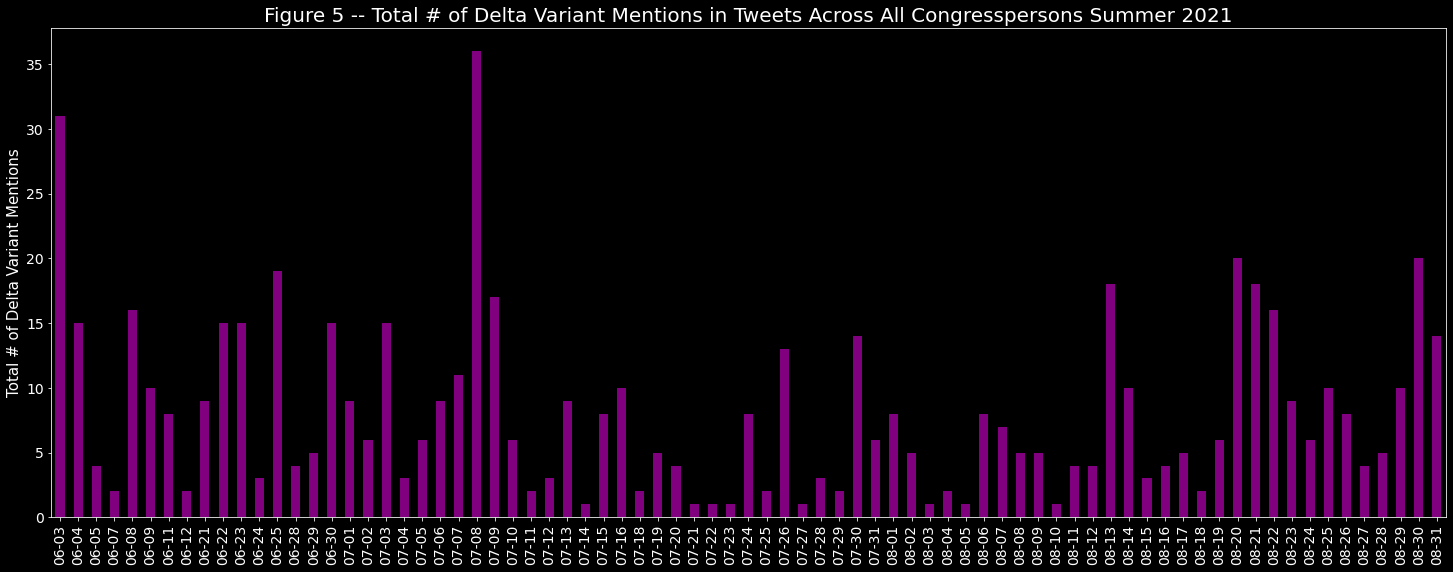

In [ ]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(25, 9))

DeltaTweets.plot("MonthDays", "Delta", kind="bar", xlabel="", ylabel="# of Delta variant mentions [day]", legend=False, ax=ax, fontsize=14, color="purple")



ax.set_ylabel("Total # of Delta Variant Mentions", fontsize=15)
ax.set_title("Figure 5 -- Total # of Delta Variant Mentions in Tweets Across All Congresspersons Summer 2021", fontsize=20)

**Figure 5:** Figure 5 above plots the total # of Delta variant mentions of the Coronavirus pandemic by members of Congress throughout the summer of 2021. The x-axis represents the date and is in ascending order from the beginning of June 2021 on the far left end of the x-axis to the end of August 2021 on the far right end of the x-axis. For those dates (Month-Days) that are not listed across the x-axis signifies that there were 0 mentions of Delta variant on that respective day. The y-axis shows the total # of Delta variant mentions at a range of roughly 0 mentions to 37 total daily mentions. Overall, this plot in figure 5 referencing total count of Delta variant mentions amongst Congresspersons [does not necessarily match and or track the actual level of positive COVID tests during this time](https://www.nytimes.com/interactive/2021/us/covid-cases.html) as positive cases really began to explode upward towards the end of August while the total highest number of delta variant mentions by congresspersons in summer 2021 according to figure 5 occurred on the day July 8th. However, it is important to notice that there is more 'activity' or 'density' so to say in figure 5 as we near the end of August on the x-axis for total mentions of the delta variant by congresspersons in summer 2021

Throughout the summer of 2021, there were significant policy decisions being made regarding the reopening of school systems.

**Count the total number tweets that mention "teachers" AND either "safe" OR "safety".  Do the numbers of mentions differ by political party?**

In [ ]:
TeachersSafe = tweets[(tweets['text'].str.contains("teachers")) & (tweets['text'].str.contains('safe'))]




In [ ]:
TeachersSafe

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Party,Twitter,Instagram,Facebook,LastName,FirstName,MonthDay,Delta
1705,1417957449223507968,RepBourdeaux,1343620645452595200,2021-07-21T17:19:34-04:00,https://www.twitter.com/RepBourdeaux/statuses/...,As an educator and representative of the large...,Twitter Web App,21,Georgia 7th District,U.S. Prepresentative,"Bourdeaux, Carolyn",D,RepBourdeaux,@carolyn4congress,x,Bourdeaux,Carolyn,07-21,False
10872,1424520826544705536,RepGregStanton,1080885078425784320,2021-08-08T20:00:06-04:00,https://www.twitter.com/RepGregStanton/statuse...,The best place for kids to learn is in the cla...,Twitter for iPhone,08,Arizona 9th District,U.S. Prepresentative,"Stanton, Greg",D,RepGregStanton,@repgregstanton,x,Stanton,Greg,08-08,False
10927,1432773255673286656,RepGregStanton,1080885078425784320,2021-08-31T14:32:18-04:00,https://www.twitter.com/RepGregStanton/statuse...,Maricopa County schools that don’t have a mask...,Twitter Web App,31,Arizona 9th District,U.S. Prepresentative,"Stanton, Greg",D,RepGregStanton,@repgregstanton,x,Stanton,Greg,08-31,False
11202,1428001614674137088,RepCindyAxne,1080865917377097728,2021-08-18T10:31:30-04:00,https://www.twitter.com/RepCindyAxne/statuses/...,NEW: With school resuming soon &amp; COVID-19 ...,Twitter Web App,18,Iowa 3rd District,U.S. Prepresentative,"Axne, Cynthia",D,RepCindyAxne,@repcindyaxne,x,Axne,Cynthia,08-18,False
12398,1430674641316614144,RepPressley,1080584229510172672,2021-08-25T19:33:09-04:00,https://www.twitter.com/RepPressley/statuses/1...,We've been fighting hard for this school mask ...,Twitter Web App,25,Massachusetts 7th District,U.S. Prepresentative,"Pressley, Ayanna",D,RepPressley,@ayannapressley,x,Pressley,Ayanna,08-25,False
15279,1430607577843384320,RepJasonCrow,1080191866509901824,2021-08-25T15:06:40-04:00,https://www.twitter.com/RepJasonCrow/statuses/...,The most important thing on your back-to-schoo...,Twitter Web App,25,Colorado 6th District,U.S. Prepresentative,"Crow, Jason",D,RepJasonCrow,@repjasoncrow,x,Crow,Jason,08-25,False
16575,1428455745834602496,RepSpanberger,1078771401497161728,2021-08-19T16:36:03-04:00,https://www.twitter.com/RepSpanberger/statuses...,After the unprecedented challenges of last yea...,Twitter Media Studio,19,Virginia 7th District,U.S. Prepresentative,"Spanberger, Abigail",D,RepSpanberger,@abigailspanberger,x,Spanberger,Abigail,08-19,False
16581,1428801780113149952,RepSpanberger,1078771401497161728,2021-08-20T15:31:04-04:00,https://www.twitter.com/RepSpanberger/statuses...,It is so impressive to see the commitment our ...,Twitter Web App,20,Virginia 7th District,U.S. Prepresentative,"Spanberger, Abigail",D,RepSpanberger,@abigailspanberger,x,Spanberger,Abigail,08-20,False
17282,1422905162251870208,RepColinAllred,1078355119920562176,2021-08-04T09:00:01-04:00,https://www.twitter.com/RepColinAllred/statuse...,The #COVID19 vaccine is key for our kids and t...,Twitter Web App,04,Texas 32nd District,U.S. Prepresentative,"Allred, Colin",D,RepColinAllred,@repcolinallred,x,Allred,Colin,08-04,False
21154,1412789560602415104,RepCloudTX,1039879658400112640,2021-07-07T11:04:14-04:00,https://www.twitter.com/rachelbovard/statuses/...,RT @rachelbovard “More than 50 million student...,Twitter for iPhone,07,Texas 27th District,U.S. Prepresentative,"Cloud, Michael",R,RepCloudTX,@michaeljcloud,x,Cloud,Michael,07-07,False


In [ ]:
TeachersSafe.groupby("Party").count()

,id,screen_name,user_id,time,link,text,source,day,State,Member of Congress,Name,Twitter,Instagram,Facebook,LastName,FirstName,MonthDay,Delta
Party,,,,,,,,,,,,,,,,,,
D,50,50,50,50,50,50,50,50,50,50,50,50,48,50,50,49,50,50
R,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


Overall -- there were a total of 52 tweets that mentioned both "teachers" & "safe". We see from the analysis above that there are substantial differences in party orientation for congresspersons who sent out tweets containing these two terms. Our anlaysis shows that of the 52 tweets that contained such terms -- Democrats accounted for 50 of those tweets while Republicans accounted for only 2 of those tweets. Overall, this suggests to us that Democrats may have been much more vocal about the concerns of teacher saftey relative to Republicans. 

**Describe the various assumptions that went into the analyses you have presented above.**

In the end, there were several core assumptions that went into the analyses we have presented above. The most important one and the one that is nearly all inclusive -- is that for each subset of a dataframe I created to answer specific research questions via boolean indexing to only retrieve data that contained a specific word or phrase --> that indexing was all inclusive. This means that it didn't matter the context --> if the word such as 'Delta' was used in a tweet --> it counted as being a part of a new dataframe that only contained tweets with the mentioning of the word 'Delta'. Also, one other core assumption was in this case throughout the various analyses presneted above -- I treated the data as independent ie it was not correlated from one observation to the next or over time. Thus, plotting the daily # of tweets throughout summer of 2021 entailed ensuring each respective day was its own unique set of data. Overall, this anlayses proved highly robust and we have demonstrated thoroughly that Democrats as a whole are more prolific tweets and they care more about issues relating to the pandemic and teacher safety. 